In [ ]:
!python -m spacy download el_core_news_md

     |████████████████████████████████| 132.6MB 1.2MB/s 
  Created wheel for el-core-news-md: filename=el_core_news_md-2.2.5-cp36-none-any.whl size=137053459 sha256=cbfb149bf341903d5de814aaf2b7fc6ad9e43b5c63a8c6fbb12fc938c231a951
  Stored in directory: /tmp/pip-ephem-wheel-cache-6bu3j8_8/wheels/e3/70/65/a02c5c86342d8a6d6d25664309af6137a0c514206e96438251
Successfully built el-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
import pandas as pd
import numpy as np

import requests
import os
import nltk.sentiment

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
!pip install NRCLex
from nrclex import NRCLex

     |████████████████████████████████| 399kB 6.2MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-cp36-none-any.whl size=43311 sha256=9b4071ca0d03046e5d509dac7b8dac85c3d2e9d21c4450f8c5507ce46e00dfb9
  Stored in directory: /root/.cache/pip/wheels/17/31/64/035a8d245b4c217aeb8e8a2702d05dc91544b9c2334db72414
Successfully built NRCLex


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
df_news = pd.read_csv("/gdrive/My Drive/Colab Notebooks/finaldfprotothema.csv")
df_news 

,Unnamed: 0,headline,url,date,body,comments
0,0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α..."
1,1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά..."
2,2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ..."
3,3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε..."
4,4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ..."
...,...,...,...,...,...,...
3000,3000,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ..."
3001,3001,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ..."
3002,3002,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ..."
3003,3003,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Α5 25/02/2020, 10:11 Μπορεί κάποιος δικηγόρος..."


In [ ]:
df_news = df_news.drop(columns=['Unnamed: 0'])
df_news

,headline,url,date,body,comments
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α..."
1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά..."
2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ..."
3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε..."
4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ..."
...,...,...,...,...,...
3000,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ..."
3001,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ..."
3002,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ..."
3003,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Α5 25/02/2020, 10:11 Μπορεί κάποιος δικηγόρος..."


In [ ]:
df_news.comments.iloc[0]

" Πόση 10/12/2020, 12:50 βλακεία πιά...με την Αττική και την πρωτιά....σε 4εκατ κατοίκους!! Τόσο ηλίθιοι είμαστε για να χρησιμοποιούνται τέτοιου είδους λέξεις και εκφράσεις για ποσοστό 0,009% !!!!! Απάντηση $$ ΤΕΛΑΜΩΝ 10/12/2020, 11:41 ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ ΑΝΘΡΩΠΟΙ ,ΠΟΥ ΔΕΝ ΤΗΡΟΥΝ ΤΑ ΥΓΕΙΟΝΟΜΙΚΑ ΜΕΤΡΑ .. ΘΕΛΟΥΝ ΝΑ ΑΡΡΩΣΤΗΣΟΥΝ ? ΝΟΜΙΖΟΥΝ ΟΤΙ ΕΙΝΑΙ ΑΤΡΩΤΟΙ? .. ΟΙ ΗΛΙΚΙΩΜΕΝΟΙ ΝΑ ΚΑΘΙΣΟΥΝ ΣΤΑ ΣΠΙΤΙΑ ΤΟΥΝ ΝΑ ΒΛΕΠΟΥΝ ΤΗΛΕΟΡΑΣΗ ,ΝΑ ΣΤΑΜΑΤΙΣΟΥΝ ΤΙΣ ΑΣΚΟΠΕΣ ΒΟΛΤΕΣ ,ΝΑ ΚΑΘΟΝΤΑΙ ΣΤΑ ΠΑΓΚΑΚΙΑ Ο ΕΝΑΣ ΔΙΠΛΑ ΣΤΟΝ ΑΛΛΟ , ΝΑ ΚΑΘΟΝΤΑΙ ΣΤΙΣ ΟΥΡΕΣ ΕΞΩ ΑΠΟ ΤΙΣ ΤΡΑΠΕΖΕΣ ΓΙΑ ΝΑ ΚΑΝΟΥΝ ΕΝΗΜΕΡΩΣΗ ΤΟΥ ΒΙΒΛΙΑΡΙΟΥ ΤΟΥΣ... Απάντηση $$ Yin 10/12/2020, 10:54 Τσίοδρας.....άλλο λαμ@@ιο κ αυτός που το παίζει κ θρήσκος ...μεγάλος α@@@@νας Απάντηση $$ Alert 10/12/2020, 09:43 ======> Κοψτους το μισθο 50% και ξαναρωτα τους αν πρεπει να παραταθει το λοκνταουν? Απάντηση $$ @Alert 10/12/2020, 10:15 γιατί να τους κόψει το μισθό; Εκείνοι, σε αντίθεση με σένα τώρα δουλεύουν περισσότερο. Απάντηση $$ Ελεος 10/12/2020, 0

In [ ]:
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

df_news = splitDataFrameList(df_news,'comments','$$')

In [ ]:
df_news

,headline,url,date,body,comments
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α..."
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ 10/12/2020, 11:41 ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙ..."
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Yin 10/12/2020, 10:54 Τσίοδρας.....άλλο λαμ@@..."
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert 10/12/2020, 09:43 ======> Κοψτους το μι..."
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert 10/12/2020, 10:15 γιατί να τους κόψει ..."
...,...,...,...,...,...
23168,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos 25/02/2020, 09:53 Alert. Alert. Aler..."
23169,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george 25/02/2020, 09:48 ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ..."
23170,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden 25/02/2020, 09:41 Γρίπη: θνησιμότητα 0..."
23171,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... 25/02/2020, 09:37 Κοιμαμαι ησυχ..."


In [ ]:
df_news['comments'] = df_news['comments'].str.replace('Απάντηση','')


In [ ]:
df_news['comments'] = df_news['comments'].str.replace('\d{2}/\d{2}/\d{4}','')
df_news

,headline,url,date,body,comments
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , 12:50 βλακεία πιά...με την Αττική και ..."
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , 11:41 ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟ..."
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Yin , 10:54 Τσίοδρας.....άλλο λαμ@@ιο κ αυτός..."
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , 09:43 ======> Κοψτους το μισθο 50% κα..."
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , 10:15 γιατί να τους κόψει το μισθό; ..."
...,...,...,...,...,...
23168,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , 09:53 Alert. Alert. Alert. Alert. ..."
23169,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , 09:48 ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο Λ..."
23170,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , 09:41 Γρίπη: θνησιμότητα 0,01-0,02%...."
23171,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... , 09:37 Κοιμαμαι ησυχως τα βραδ..."


In [ ]:
df_news['comments'] = df_news['comments'].str.replace("\d\d:\d\d"," ", regex=True)
df_news


,headline,url,date,body,comments
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ..."
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α..."
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Yin , Τσίοδρας.....άλλο λαμ@@ιο κ αυτός που..."
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα..."
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί..."
...,...,...,...,...,...
23168,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , Alert. Alert. Alert. Alert. Aler..."
23169,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ..."
23170,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , Γρίπη: θνησιμότητα 0,01-0,02%. Κορ..."
23171,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια....."


In [ ]:
df_news['comments'].iloc[3]

' Alert ,   ======> Κοψτους το μισθο 50% και ξαναρωτα τους αν πρεπει να παραταθει το λοκνταουν?  '

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords

In [ ]:
df_news['Sxolia'] = df_news['comments'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
import spacy
nlp = spacy.load('el_core_news_md')

In [ ]:
sw = nlp.Defaults.stop_words

In [ ]:
#καθαρισμός σημείων στίξης κλπ.
def clean_text(text):
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove stop words
    text = [x for x in text if x not in sw]
    # lower text
    #text = [remove_ton(x) for x in text]
    #remove quotes
    text = [x.replace('quot;','').replace('&quot','') for x in text if x not in ['quot','amp']]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove amp & quot
    text = [x for x in text if x not in ['quot','amp']]
    # remove words with only one letter
    text = " ".join([t for t in text if len(t) > 1])
    # lemmatize text
    #text = " ".join([(t.lemma_) for t in nlp(text)])
    return(text)

In [ ]:
df_news['Sxolia_clean'] = df_news['Sxolia'].apply(lambda x : clean_text(x) )
df_news['Sxolia_clean']

0        Ποση βλακεια πια...με Αττικη πρωτια....σε κατο...
1        ΤΕΛΑΜΩΝ ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ ΑΝΘΡΩΠΟ...
2        Yin Τσιοδρας.....αλλο λαμ@@ιο αυτος παιζει θρη...
3        Alert Κοψτους μισθο ξαναρωτα πρεπει παραταθει ...
4        Alert γιατι κοψει μισθο Εκεινοι αντιθεση σενα ...
                               ...                        
23168    kyriakos Alert Alert Alert Alert Alert Alert A...
23169    george ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ ΛΟΙΜΟΞΙΟΛΟΓΟ...
23170    Golden Γριπη θνησιμοτητα Κορονοϊος θνησιμοτητα...
23171    Με Κικιλια Κοιμαμαι ησυχως βραδια Με τετοιο ξε...
23172             ΜΑΤΖΑΦΛΑΡΑΣ ΠΥΡΕΤΌ ΠΥΡΕΤΌ ειπε αθεοφοβος
Name: Sxolia_clean, Length: 23173, dtype: object

In [ ]:
def removing_accents(word):
    """
    Removes accents from a given word.
    
    Parameters
    ----------
    word : str
        the word from which we want to remove the accents

    Returns
    -------
    str
        the word without accents
    """
    return (word.replace('ά', 'α').replace('έ', 'ε').replace('ή', 'η').replace('ί', 'ι').replace('ό', 'ο').replace('ύ', 'υ')
            .replace('ώ', 'ω').replace('ϊ', 'ι').replace('ϋ', 'υ').replace('ΐ', 'ι').replace('ΰ', 'υ').replace('Ά', 'Α')
            .replace('Έ', 'Ε').replace('Ή', 'Η').replace('Ί', 'Ι').replace('Ό', 'Ο').replace('Ύ', 'Υ').replace('Ϊ', 'Ι')
            .replace('Ϋ', 'Υ').upper())

In [ ]:
df_news['Sxolia_clean'] = df_news['Sxolia'].apply(lambda x : removing_accents(x) )


In [ ]:
def lemma(text):
    doc = nlp(text)
    lemmatized_token= " ".join([token.lemma_ for token in doc])
    return(lemmatized_token)

In [ ]:
df_news['Sxolia_clean'].apply(lambda x : lemma(x) )

0          ποση ,    βλακεια πια ... με την ΑΤΤΙΚΗ και ...
1          τελαμα ,    δεν καταλαβαινω , γιατι υπαρχουν...
2          yin ,    τσιοδρας ..... αλλο λαμ@@ιο κ αυτος...
3          alert ,    = = = = = = > κοψτου το μισθο 50%...
4          @alert ,    γιατι να τους κοψει το μισθο ; ε...
                               ...                        
23168      kyriakos ,    alert . alert . alert . alert ...
23169      george ,    μαλιστα!!αποφανθηκε λοιπον ο λοι...
23170      golden ,    γριπη : θνησιμοτητα 0,01-0,02%. ...
23171      με κικιλι ... ,    κοιμαμαι ησυχως τα βραδιο...
23172      ματζαφλαρας ,    39 πυρετο ? ? ? ? ? 39 πυρε...
Name: Sxolia_clean, Length: 23173, dtype: object

In [ ]:
!pip3 install greek_stemmer 

  Created wheel for greek-stemmer: filename=greek_stemmer-0.1.1-cp36-none-any.whl size=6739 sha256=0b090b898bcae1c225879668323766d40682343cf721d80a37e8ce5f4a4f4645
  Stored in directory: /root/.cache/pip/wheels/b9/e5/39/735c9926a0da4bc26812631945f8394a697baf31d0423d154a
Successfully built greek-stemmer


In [ ]:
#ΓΙΑ ΠΡΟΣΘΗΚΗ ΣΑΝ ΕΙΚΟΝΑ ΣΤΟ ΚΕΙΜΕΝΟ (ΑΝ ΧΡΕΙΑΣΤΕΙ)
from greek_stemmer import GreekStemmer
stemmer = GreekStemmer()

stop_words = nlp.Defaults.stop_words
stop_words |= {'.',',',';','?',':','!',' ','&','/','ή','-','(',')','[',']','{','}','"','"','`','~','\xa0','αυτώ'}



In [ ]:
from greek_stemmer import GreekStemmer
stemmer = GreekStemmer()

stop_words = nlp.Defaults.stop_words
stop_words |= {'.',',',';','?',':','!',' ','&','/','ή','-','(',')','[',']','{','}','"','"','`','~','\xa0','αυτώ'}

from greek_stemmer import GreekStemmer
stemmer = GreekStemmer()
import spacy
import el_core_news_md
nlp = el_core_news_md.load()

In [ ]:
t = nlp('εισαγγελεας εισαγγελεων εισαγγελεις'.upper())
for token in t:
    print(token.text,token.lemma_,stemmer.stem(token.text))

ΕΙΣΑΓΓΕΛΕΑΣ εισαγγελεα ΕΙΣΑΓΓΕΛ
ΕΙΣΑΓΓΕΛΕΩΝ εισαγγελεος ΕΙΣΑΓΓΕΛ
ΕΙΣΑΓΓΕΛΕΙΣ εισαγγελει ΕΙΣΑΓΓΕΛ


In [ ]:
def stemming(word):
   
    t = nlp(word.upper())
    for token in t:
        print(token.text,token.lemma_,
            stemmer.stem(token.text))
    return " ".join([stemmer.stem(t.text)  for t in nlp(word.upper())]) 
    return stemmer.stem((removing_accents(word)).upper())

In [ ]:
df_news.head()

,headline,url,date,body,comments,Sxolia,Sxolia_clean
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ...","Ποση , βλακεια πια...με την Αττικη και την ...","ΠΟΣΗ , ΒΛΑΚΕΙΑ ΠΙΑ...ΜΕ ΤΗΝ ΑΤΤΙΚΗ ΚΑΙ ΤΗΝ ..."
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α..."
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Yin , Τσίοδρας.....άλλο λαμ@@ιο κ αυτός που...","Yin , Τσιοδρας.....αλλο λαμ@@ιο κ αυτος που...","YIN , ΤΣΙΟΔΡΑΣ.....ΑΛΛΟ ΛΑΜ@@ΙΟ Κ ΑΥΤΟΣ ΠΟΥ..."
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα...","Alert , ======> Κοψτους το μισθο 50% και ξα...","ALERT , ======> ΚΟΨΤΟΥΣ ΤΟ ΜΙΣΘΟ 50% ΚΑΙ ΞΑ..."
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί...","@Alert , γιατι να τους κοψει το μισθο; Εκει...","@ALERT , ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨΕΙ ΤΟ ΜΙΣΘΟ; ΕΚΕΙ..."


In [ ]:
df_news.Sxolia_clean.iloc[0]

' ΠΟΣΗ ,   ΒΛΑΚΕΙΑ ΠΙΑ...ΜΕ ΤΗΝ ΑΤΤΙΚΗ ΚΑΙ ΤΗΝ ΠΡΩΤΙΑ....ΣΕ 4ΕΚΑΤ ΚΑΤΟΙΚΟΥΣ!! ΤΟΣΟ ΗΛΙΘΙΟΙ ΕΙΜΑΣΤΕ ΓΙΑ ΝΑ ΧΡΗΣΙΜΟΠΟΙΟΥΝΤΑΙ ΤΕΤΟΙΟΥ ΕΙΔΟΥΣ ΛΕΞΕΙΣ ΚΑΙ ΕΚΦΡΑΣΕΙΣ ΓΙΑ ΠΟΣΟΣΤΟ 0,009% !!!!!  '

In [ ]:
df_news['Sxolia_clean'] = df_news['Sxolia_clean'].apply(lambda x : stemming(x) )
df_news['Sxolia_clean'] 

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
ΝΑ να ΝΑ
ΜΑΣ μας ΜΑΣ
ΠΕΙ πει Π
ΟΤΙ οτι ΟΤΙ
ΤΕΛΙΚΑ τελικα ΤΕΛΙΚ
ΔΕΝ δεν ΔΕΝ
ΕΙΝΑΙ ειναι ΕΙΝΑΙ
ΤΙΠΟΤΑ τιποτος ΤΙΠΟΤΑ
? ? ?
? ? ?
? ? ?
ΟΣΟ οσο ΟΣΟ
ΓΙΑ για ΓΙΑ
ΤΟ το ΤΟ
ΑΝ αν ΑΝ
ΝΟΣΟΥΝ νοσουν Ν
ΤΑ τα ΤΑ
ΠΑΙΔΙΑ παιδι ΠΑΙΔ
ΤΑ τα ΤΑ
ΝΕΑ νεος ΝΕ
ΤΗΣ της ΤΗΣ
ΗΜΕΡΑ ημερο ΗΜΕΡ
ΣΗΜΕΡΑ σημερα ΣΗΜΕΡ
ΕΧΟΥΝ εχω ΕΧ
ΤΗΝ την ΤΗΝ
ΑΠΑΝΤΗΣΗ απαντηση ΑΠΑΝΤΗΣ
.... .... ....
ΣΕΝ ΣΕΝ ΣΕΝ
ΕΙΝΑΙ ειναι ΕΙΝΑΙ
ΤΟΣΟ τοσο ΤΟΣ
ΚΑΛΑ καλα ΚΑΛ
ΤΑ τα ΤΑ
ΠΡΑΓΜΑΤΑ πραγμαα ΠΡΑΓΜ
Κ κ Κ
ΑΣ ΑΣ ΑΣ
ΛΕΝΕ λενε ΛΕΝ
ΟΤΙ οτι ΟΤΙ
ΔΕΝ δεν ΔΕΝ
ΕΙΝΑΙ ειναι ΕΙΝΑΙ
ΤΙΠΟΤΑ τιποτος ΤΙΠΟΤΑ
ΚΤΛ κτλ ΚΤΛ
.... .... ....
     
     
ΝΑΝΤΙΑ ΝΑΝΤΙΑ ΝΑΝΤ
, , ,
        
ΣΕ σε ΣΕ
ΠΕΡΙΠΤΩΣΗ περιπτωση ΠΕΡΙΠΤΩΣ
ΠΟΥ πο ΠΟΥ
ΥΠΑΡΞΕΙ υπαρξει ΥΠΑΡΞ
ΚΟΡΩΝΟΙΟΣ ΚΟΡΩΝΟΙΟΣ ΚΟΡΩΝΟΙ
ΣΤΑ στα ΣΤ
ΚΕΝΤΡΑ κεντρο ΚΕΝΤΡ
ΜΕΤΑΝΑΣΤΩΝ μεταναστο ΜΕΤΑΝΑΣΤ
ΤΙ τι ΤΙ
ΘΑ θα ΘΑ
ΓΙΝΕΙ γινω ΓΙΝ
? ? ?
     
     
WALKING walking WALKING
DEAD dead DEAD
! ! !
! ! !
! ! !
, , ,
        
. . .
     
     
ΘΑ θα ΘΑ
ΦΑΓΩΘΟΥΝΕ φαγωθουνε ΦΑΓΩΘ

0          ΠΟΣ ,    ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ...
1          ΤΕΛΑΜ ,    ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ...
2          YIN ,    ΤΣΙΟΔΡ ..... ΑΛΛ ΛΑΜ@@ΙΟ Κ ΑΥΤ ΠΟΥ ...
3          ALERT ,    = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ...
4          @ALERT ,    ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ...
                               ...                        
23168      KYRIAKOS ,    ALERT . ALERT . ALERT . ALERT ...
23169      GEORGE ,    ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ...
23170      GOLDEN ,    ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ...
23171      ΜΕ ΚΙΚΙΛ ... ,    ΚΟΙΜ ΗΣΥΧΩΣ ΤΑ ΒΡΑΔ ... ΜΕ...
23172      ΜΑΤΖΑΦΛΑΡ ,    39 ΠΥΡΕΤ ? ? ? ? ? 39 ΠΥΡΕΤ ?...
Name: Sxolia_clean, Length: 23173, dtype: object

In [ ]:
df_news.Sxolia_clean.iloc[1]

'  ΤΕΛΑΜ ,    ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡΩΠ , ΠΟΥ ΔΕΝ ΤΗΡ ΤΑ ΥΓΕΙΟΝΟΜ ΜΕΤΡ .. ΘΕΛ ΝΑ ΑΡΡΩΣΤ ? ΝΟΜΙΖ ΟΤΙ ΕΙΝΑΙ ΑΤΡΩΤ ? .. ΟΙ ΗΛΙΚΙΩΜΕΝ ΝΑ ΚΑΘΙΣ ΣΤ ΣΠΙΤ Τ ΝΑ ΒΛΕΠ ΤΗΛΕΟΡΑΣ , ΝΑ ΣΤΑΜΑΤΙΣ ΤΙΣ ΑΣΚΟΠ ΒΟΛΤ , ΝΑ ΚΑΘ ΣΤ ΠΑΓΚΑΚ Ο ΕΝ ΔΙΠΛ ΣΤΟΝ ΑΛΛ , ΝΑ ΚΑΘ ΣΤΙΣ ΟΥΡ ΕΞΩ ΑΠΟ ΤΙΣ ΤΡΑΠΕΖ ΓΙΑ ΝΑ ΚΑΝ ΕΝΗΜΕΡΩΣ ΤΟΥ ΒΙΒΛΙΑΡ ΤΟΥΣ ...  '

In [ ]:
df_news

,headline,url,date,body,comments,Sxolia,Sxolia_clean
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ...","Ποση , βλακεια πια...με την Αττικη και την ...","ΠΟΣ , ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ..."
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ..."
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Yin , Τσίοδρας.....άλλο λαμ@@ιο κ αυτός που...","Yin , Τσιοδρας.....αλλο λαμ@@ιο κ αυτος που...","YIN , ΤΣΙΟΔΡ ..... ΑΛΛ ΛΑΜ@@ΙΟ Κ ΑΥΤ ΠΟΥ ..."
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα...","Alert , ======> Κοψτους το μισθο 50% και ξα...","ALERT , = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ..."
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί...","@Alert , γιατι να τους κοψει το μισθο; Εκει...","@ALERT , ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ..."
...,...,...,...,...,...,...,...
23168,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , Alert. Alert. Alert. Alert. Aler...","kyriakos , Alert. Alert. Alert. Alert. Aler...","KYRIAKOS , ALERT . ALERT . ALERT . ALERT ..."
23169,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","GEORGE , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ..."
23170,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , Γρίπη: θνησιμότητα 0,01-0,02%. Κορ...","Golden , Γριπη: θνησιμοτητα 0,01-0,02%. Κορ...","GOLDEN , ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ..."
23171,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","ΜΕ ΚΙΚΙΛ ... , ΚΟΙΜ ΗΣΥΧΩΣ ΤΑ ΒΡΑΔ ... ΜΕ..."


In [ ]:
#df_news['Sxolia_clean'] = df_news['Sxolia_clean'].str.replace('ΑΠΑΝΤΗΣ ','')
df_news['Sxolia_clean'] 

0          ΠΟΣ ,    ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ...
1          ΤΕΛΑΜ ,    ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ...
2          YIN ,    ΤΣΙΟΔΡ ..... ΑΛΛ ΛΑΜ@@ΙΟ Κ ΑΥΤ ΠΟΥ ...
3          ALERT ,    = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ...
4          @ALERT ,    ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ...
                               ...                        
23168      KYRIAKOS ,    ALERT . ALERT . ALERT . ALERT ...
23169      GEORGE ,    ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ...
23170      GOLDEN ,    ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ...
23171      ΜΕ ΚΙΚΙΛ ... ,    ΚΟΙΜ ΗΣΥΧΩΣ ΤΑ ΒΡΑΔ ... ΜΕ...
23172      ΜΑΤΖΑΦΛΑΡ ,    39 ΠΥΡΕΤ ? ? ? ? ? 39 ΠΥΡΕΤ ?...
Name: Sxolia_clean, Length: 23173, dtype: object

In [ ]:
df_news.to_csv("/gdrive/My Drive/Colab Notebooks/FINALsxoliacleanpthemanosent.csv", encoding="utf-8", index=False)


In [ ]:
AIL_df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/greek_intensity.csv")
AIL_df

,term,score,AffectDimension
0,εξοργισμένοι,0.964,anger
1,κτηνωδία,0.959,anger
2,έχθρα,0.953,anger
3,μισητός,0.940,anger
4,τρομοκρατώ,0.939,anger
...,...,...,...
9439,ψεύδος,0.164,trust
9440,φυγάς,0.141,trust
9441,διαζύγιο,0.133,trust
9442,δόλωμα,0.133,trust


In [ ]:
AIL_df['term'] = AIL_df['term'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω').str.upper()

In [ ]:
AIL_df['term'] = AIL_df['term'].apply(lambda x : stemming(x) )

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
ΟΜΟΛΟΓΙΑ ομολογιας ΟΜΟΛΟΓ
ΨΕΓΑΔΙ ψεγαδι ΨΕΓΑΔ
ΑΠΟΣΠΑΣΜΑ αποσπασμας ΑΠΟΣΠΑΣΜ
ΧΩΡΟΦΥΛΑΚΗΣ χωροφυλακη ΧΩΡΟΦΥΛΑΚ
ΑΚΡΟΑΣΗ ακροαση ΑΚΡΟΑΣ
ΞΕΧΑΣΜΕΝΟΣ ξεχασμενο ΞΕΧΑΣΜΕΝ
ΒΥΘΙΖΩ ΒΥΘΙΖΩ ΒΥΘΙΖ
ΛΕΙΤΟΥΡΓΙΑ λειτουργι ΛΕΙΤΟΥΡΓ
ΑΝΥΨΩΣΗ ανυψωση ΑΝΥΨΩΣ
ΣΑΓΚΑΗ σαγκαη ΣΑΓΚΑ
ΚΟΥΚΟΥΛΑ κουκουλας ΚΟΥΚΟΥΛ
ΠΡΟΒΛΗΜΑ προβλημο ΠΡΟΒΛΗΜ
ΟΛΙΣΘΑΙΝΩ ολισθαινω ΟΛΙΣΘΑΙΝ
ΑΥΠΝΙΑ αυπνιας ΑΥΠΝ
ΑΚΡΟΒΑΤΗΣ ΑΚΡΟΒΑΤΗΣ ΑΚΡΟΒΑΤ
ΑΝΑΤΑΡΑΞΕΙΣ αναταραξει ΑΝΑΤΑΡΑΞ
ΔΥΝΑΜΗ δυναμη ΔΥΝΑΜ
ΩΘΗΣΗ ωθηση ΩΘΗΣ
ΑΜΥΝΑ αμυνο ΑΜΥΝ
ΥΠΟΘΗΚΕΥΤΗΣ ΥΠΟΘΗΚΕΥΤΗΣ ΥΠΟΘΗΚΕΥΤ
ΤΡΕΞΙΜΟ τρεξιμο ΤΡΕΞΙΜ
ΚΑΤΕΡΓΑΡΗΣ ΚΑΤΕΡΓΑΡΗΣ ΚΑΤΕΡΓΑΡ
ΣΤΑΣΗ σταση ΣΤΑΣ
ΑΜΦΙΒΟΛΙΑ αμφιβολια ΑΜΦΙΒΟΛ
ΚΑΤΑΡΡΑΚΤΗΣ ΚΑΤΑΡΡΑΚΤΗΣ ΚΑΤΑΡΡΑΚΤ
ΜΕΤΑΝΟΩ μετανοω ΜΕΤΑΝΟ
ΑΓΝΩΣΤΟΣ αγνωστος ΑΓΝΩΣΤ
ΠΑΡΑΠΛΑΝΗΤΙΚΗ παραπλανητικη ΠΑΡΑΠΛΑΝΗΤ
ΠΕΡΙΠΟΙΗΤΙΚΟΣ ΠΕΡΙΠΟΙΗΤΙΚΟΣ ΠΕΡΙΠΟΙΗΤ
ΣΤΡΙΓΓΛΑ ΣΤΡΙΓΓΛΑ ΣΤΡΙΓΓΛ
ΥΠΕΡΑΣΠΙΖΩ ΥΠΕΡΑΣΠΙΖΩ ΥΠΕΡΑΣΠΙΖ
ΦΡΟΥΡΑ φρουρας ΦΡΟΥΡ
ΑΠΟΔΙΟΠΟΜΠΑΙΟΣ αποδιοπομπαιος ΑΠΟΔΙΟΠΟΜΠΑΙ
ΤΡΑΓΟΣ τραγο ΤΡΑΓ
ΒΑΛΤΩΔΗΣ βαλτωδης ΒΑΛΤΩΔ
ΑΝΤΙΔΡΩ αντιδρω Α

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
AIL_df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/AIL_df.csv")
AIL_df

,term,score,AffectDimension
0,ΕΞΟΡΓΙΣΜΕΝ,0.964,anger
1,ΚΤΗΝΩΔ,0.959,anger
2,ΕΧΘΡ,0.953,anger
3,ΜΙΣΗΤ,0.940,anger
4,ΤΡΟΜΟΚΡΑΤ,0.939,anger
...,...,...,...
9439,ΨΕΥΔ,0.164,trust
9440,ΦΥΓ,0.141,trust
9441,ΔΙΑΖΥΓ,0.133,trust
9442,ΔΟΛΩΜ,0.133,trust


In [ ]:
AIL_df.drop_duplicates(subset=['term','AffectDimension'], keep='first', inplace = True)
AIL_df.reset_index(drop=True, inplace = True)

In [ ]:
AIL_df[AIL_df['AffectDimension'].str.contains("disgust")].head(25)

,term,score,AffectDimension
1870,ΚΑΝΝΙΒΑΛΙΣΜ,0.953,disgust
1871,ΑΚΡΩΤΗΡΙΑΣΜ,0.930,disgust
1872,ΠΑΡΕΝΟΧΛΗΣ,0.914,disgust
1873,ΑΙΜΟΜΙΞ,0.914,disgust
1874,ΒΛΕΝΝΟΡΡΟΙ,0.906,disgust
1875,ΒΙΑΣΜ,0.906,disgust
1876,ΑΝΘΡΩΠΟΦΑΓ,0.898,disgust
1877,ΣΑΠΙΛ,0.891,disgust
1878,ΠΤΩΜ,0.883,disgust
1879,ΣΦΑΓ,0.883,disgust


In [ ]:
#anger
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_anger_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[0]

get_anger_score('ΕΞΟΡΓΙΣΜΕΝ')

0.964

In [ ]:
df_news ['Anger_intensity'] = df_news['Sxolia_clean'].apply(lambda x: get_anger_score(x))

In [ ]:
#fear

w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_fear_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[3]


get_fear_score('ΦΟΒ')

0.8590000000000001

In [ ]:
df_news ['Fear_intensity'] = df_news['Sxolia_clean'].apply(lambda x: get_fear_score(x))
df_news ['Fear_intensity']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
23168    0.168700
23169    0.365478
23170    0.656333
23171    0.000000
23172    0.510667
Name: Fear_intensity, Length: 23173, dtype: float64

In [ ]:
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_joy_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[4]

get_joy_score('ΧΑΡ')

0.924

In [ ]:
df_news ['Joy_intensity'] = df_news['Sxolia_clean'].apply(lambda x: get_joy_score(x))


In [ ]:
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_sadness_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[5]

get_sadness_score('ΚΑΤΗΦΕΙ')

0.625

In [ ]:
df_news ['Sadness_intensity'] = df_news['Sxolia_clean'].apply(lambda x: get_sadness_score(x))
df_news ['Sadness_intensity']

0        0.000000
1        0.102778
2        0.000000
3        0.117500
4        0.000000
           ...   
23168    0.160100
23169    0.154304
23170    0.333333
23171    0.101500
23172    0.232333
Name: Sadness_intensity, Length: 23173, dtype: float64

In [ ]:
df_news

,headline,url,date,body,comments,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ...","Ποση , βλακεια πια...με την Αττικη και την ...","ΠΟΣ , ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ...",0.199800,0.000000,0.143000,0.000000
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ...",0.035333,0.000000,0.095111,0.102778
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Yin , Τσίοδρας.....άλλο λαμ@@ιο κ αυτός που...","Yin , Τσιοδρας.....αλλο λαμ@@ιο κ αυτος που...","YIN , ΤΣΙΟΔΡ ..... ΑΛΛ ΛΑΜ@@ΙΟ Κ ΑΥΤ ΠΟΥ ...",0.000000,0.000000,0.000000,0.000000
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα...","Alert , ======> Κοψτους το μισθο 50% και ξα...","ALERT , = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ...",0.000000,0.000000,0.117000,0.117500
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί...","@Alert , γιατι να τους κοψει το μισθο; Εκει...","@ALERT , ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ...",0.250000,0.000000,0.117000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
23168,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , Alert. Alert. Alert. Alert. Aler...","kyriakos , Alert. Alert. Alert. Alert. Aler...","KYRIAKOS , ALERT . ALERT . ALERT . ALERT ...",0.169100,0.168700,0.054700,0.160100
23169,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","GEORGE , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ...",0.163174,0.365478,0.069435,0.154304
23170,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , Γρίπη: θνησιμότητα 0,01-0,02%. Κορ...","Golden , Γριπη: θνησιμοτητα 0,01-0,02%. Κορ...","GOLDEN , ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ...",0.208000,0.656333,0.000000,0.333333
23171,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","ΜΕ ΚΙΚΙΛ ... , ΚΟΙΜ ΗΣΥΧΩΣ ΤΑ ΒΡΑΔ ... ΜΕ...",0.000000,0.000000,0.246500,0.101500


In [ ]:
df_news.dropna(inplace=True)
df_news

,headline,url,date,body,comments,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ...","Ποση , βλακεια πια...με την Αττικη και την ...","ΠΟΣ , ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ...",0.199800,0.000000,0.143000,0.000000
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ...",0.035333,0.000000,0.095111,0.102778
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Yin , Τσίοδρας.....άλλο λαμ@@ιο κ αυτός που...","Yin , Τσιοδρας.....αλλο λαμ@@ιο κ αυτος που...","YIN , ΤΣΙΟΔΡ ..... ΑΛΛ ΛΑΜ@@ΙΟ Κ ΑΥΤ ΠΟΥ ...",0.000000,0.000000,0.000000,0.000000
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα...","Alert , ======> Κοψτους το μισθο 50% και ξα...","ALERT , = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ...",0.000000,0.000000,0.117000,0.117500
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί...","@Alert , γιατι να τους κοψει το μισθο; Εκει...","@ALERT , ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ...",0.250000,0.000000,0.117000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
23168,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , Alert. Alert. Alert. Alert. Aler...","kyriakos , Alert. Alert. Alert. Alert. Aler...","KYRIAKOS , ALERT . ALERT . ALERT . ALERT ...",0.169100,0.168700,0.054700,0.160100
23169,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","GEORGE , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ...",0.163174,0.365478,0.069435,0.154304
23170,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , Γρίπη: θνησιμότητα 0,01-0,02%. Κορ...","Golden , Γριπη: θνησιμοτητα 0,01-0,02%. Κορ...","GOLDEN , ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ...",0.208000,0.656333,0.000000,0.333333
23171,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","ΜΕ ΚΙΚΙΛ ... , ΚΟΙΜ ΗΣΥΧΩΣ ΤΑ ΒΡΑΔ ... ΜΕ...",0.000000,0.000000,0.246500,0.101500


In [ ]:
cols = [ 'Anger_intensity', 'Joy_intensity', 'Sadness_intensity',
       'Fear_intensity']
df_news[cols] = df_news[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
df_news[cols].dropna(inplace=False)

,Anger_intensity,Joy_intensity,Sadness_intensity,Fear_intensity
0,0.199800,0.143000,0.000000,0.000000
1,0.035333,0.095111,0.102778,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.117000,0.117500,0.000000
4,0.250000,0.117000,0.000000,0.000000
...,...,...,...,...
23168,0.169100,0.054700,0.160100,0.168700
23169,0.163174,0.069435,0.154304,0.365478
23170,0.208000,0.000000,0.333333,0.656333
23171,0.000000,0.246500,0.101500,0.000000


In [ ]:
df_news

,headline,url,date,body,comments,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ...","Ποση , βλακεια πια...με την Αττικη και την ...","ΠΟΣ , ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ...",0.199800,0.000000,0.143000,0.000000
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ...",0.035333,0.000000,0.095111,0.102778
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Yin , Τσίοδρας.....άλλο λαμ@@ιο κ αυτός που...","Yin , Τσιοδρας.....αλλο λαμ@@ιο κ αυτος που...","YIN , ΤΣΙΟΔΡ ..... ΑΛΛ ΛΑΜ@@ΙΟ Κ ΑΥΤ ΠΟΥ ...",0.000000,0.000000,0.000000,0.000000
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα...","Alert , ======> Κοψτους το μισθο 50% και ξα...","ALERT , = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ...",0.000000,0.000000,0.117000,0.117500
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί...","@Alert , γιατι να τους κοψει το μισθο; Εκει...","@ALERT , ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ...",0.250000,0.000000,0.117000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
23168,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , Alert. Alert. Alert. Alert. Aler...","kyriakos , Alert. Alert. Alert. Alert. Aler...","KYRIAKOS , ALERT . ALERT . ALERT . ALERT ...",0.169100,0.168700,0.054700,0.160100
23169,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","GEORGE , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ...",0.163174,0.365478,0.069435,0.154304
23170,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , Γρίπη: θνησιμότητα 0,01-0,02%. Κορ...","Golden , Γριπη: θνησιμοτητα 0,01-0,02%. Κορ...","GOLDEN , ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ...",0.208000,0.656333,0.000000,0.333333
23171,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","ΜΕ ΚΙΚΙΛ ... , ΚΟΙΜ ΗΣΥΧΩΣ ΤΑ ΒΡΑΔ ... ΜΕ...",0.000000,0.000000,0.246500,0.101500


In [ ]:
index_col = df_news[ (df_news['Anger_intensity'] >= 0) & (df_news['Fear_intensity'] <= 0) & (df_news['Joy_intensity'] <= 0)& (df_news['Sadness_intensity'] <= 0)].index 
df_news.drop(index_col, inplace = True) 
df_news


,headline,url,date,body,comments,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ...","Ποση , βλακεια πια...με την Αττικη και την ...","ΠΟΣ , ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ...",0.199800,0.000000,0.143000,0.000000
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ...",0.035333,0.000000,0.095111,0.102778
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα...","Alert , ======> Κοψτους το μισθο 50% και ξα...","ALERT , = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ...",0.000000,0.000000,0.117000,0.117500
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί...","@Alert , γιατι να τους κοψει το μισθο; Εκει...","@ALERT , ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ...",0.250000,0.000000,0.117000,0.000000
5,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Ελεος , Δεν υπάρχει ίχνος λογικής σαυτα τ μ...","Ελεος , Δεν υπαρχει ιχνος λογικης σαυτα τ μ...","ΕΛΕ , ΔΕΝ ΥΠΑΡΧ ΙΧΝ ΛΟΓΙΚ ΣΑΥΤ Τ ΜΕΤΡ ΓΙ'...",0.029154,0.069769,0.064846,0.074538
...,...,...,...,...,...,...,...,...,...,...,...
23168,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , Alert. Alert. Alert. Alert. Aler...","kyriakos , Alert. Alert. Alert. Alert. Aler...","KYRIAKOS , ALERT . ALERT . ALERT . ALERT ...",0.169100,0.168700,0.054700,0.160100
23169,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","GEORGE , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ...",0.163174,0.365478,0.069435,0.154304
23170,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , Γρίπη: θνησιμότητα 0,01-0,02%. Κορ...","Golden , Γριπη: θνησιμοτητα 0,01-0,02%. Κορ...","GOLDEN , ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ...",0.208000,0.656333,0.000000,0.333333
23171,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","ΜΕ ΚΙΚΙΛ ... , ΚΟΙΜ ΗΣΥΧΩΣ ΤΑ ΒΡΑΔ ... ΜΕ...",0.000000,0.000000,0.246500,0.101500


In [ ]:
df_news.to_csv("/gdrive/My Drive/Colab Notebooks/FINALpthemasentiment_comments.csv", encoding="utf-8", index=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
df_news = pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINALpthemasentiment_comments.csv")
df_news 

,headline,url,date,body,comments,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ...","Ποση , βλακεια πια...με την Αττικη και την ...","ΠΟΣ , ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ...",0.199800,0.000000,0.143000,0.000000
1,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ...",0.035333,0.000000,0.095111,0.102778
2,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα...","Alert , ======> Κοψτους το μισθο 50% και ξα...","ALERT , = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ...",0.000000,0.000000,0.117000,0.117500
3,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί...","@Alert , γιατι να τους κοψει το μισθο; Εκει...","@ALERT , ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ...",0.250000,0.000000,0.117000,0.000000
4,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Ελεος , Δεν υπάρχει ίχνος λογικής σαυτα τ μ...","Ελεος , Δεν υπαρχει ιχνος λογικης σαυτα τ μ...","ΕΛΕ , ΔΕΝ ΥΠΑΡΧ ΙΧΝ ΛΟΓΙΚ ΣΑΥΤ Τ ΜΕΤΡ ΓΙ'...",0.029154,0.069769,0.064846,0.074538
...,...,...,...,...,...,...,...,...,...,...,...
19301,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , Alert. Alert. Alert. Alert. Aler...","kyriakos , Alert. Alert. Alert. Alert. Aler...","KYRIAKOS , ALERT . ALERT . ALERT . ALERT ...",0.169100,0.168700,0.054700,0.160100
19302,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","GEORGE , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ...",0.163174,0.365478,0.069435,0.154304
19303,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , Γρίπη: θνησιμότητα 0,01-0,02%. Κορ...","Golden , Γριπη: θνησιμοτητα 0,01-0,02%. Κορ...","GOLDEN , ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ...",0.208000,0.656333,0.000000,0.333333
19304,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","Με Κικιλια... , Κοιμαμαι ησυχως τα βραδια.....","ΜΕ ΚΙΚΙΛ ... , ΚΟΙΜ ΗΣΥΧΩΣ ΤΑ ΒΡΑΔ ... ΜΕ...",0.000000,0.000000,0.246500,0.101500


In [ ]:
df_news.set_index(df_news['date'],inplace=True)
df_news

,headline,url,date,body,comments,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
date,,,,,,,,,,,
2020-12-10T04:21:00Z,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση , βλακεία πιά...με την Αττική και την ...","Ποση , βλακεια πια...με την Αττικη και την ...","ΠΟΣ , ΒΛΑΚΕΙ ΠΙΑ ... ΜΕ ΤΗΝ ΑΤΤΙΚ ΚΑΙ ΤΗΝ...",0.199800,0.000000,0.143000,0.000000
2020-12-10T04:21:00Z,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜΩΝ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝΩ ,ΓΙΑΤΙ ΥΠΑΡΧΟΥΝ Α...","ΤΕΛΑΜ , ΔΕΝ ΚΑΤΑΛΑΒΑΙΝ , ΓΙΑΤΙ ΥΠΑΡΧ ΑΝΘΡ...",0.035333,0.000000,0.095111,0.102778
2020-12-10T04:21:00Z,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Alert , ======> Κοψτους το μισθο 50% και ξα...","Alert , ======> Κοψτους το μισθο 50% και ξα...","ALERT , = = = = = = > ΚΟΨΤ ΤΟ ΜΙΣΘ 50% ΚΑ...",0.000000,0.000000,0.117000,0.117500
2020-12-10T04:21:00Z,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"@Alert , γιατί να τους κόψει το μισθό; Εκεί...","@Alert , γιατι να τους κοψει το μισθο; Εκει...","@ALERT , ΓΙΑΤΙ ΝΑ ΤΟΥΣ ΚΟΨ ΤΟ ΜΙΣΘ ; ΕΚΕΙ...",0.250000,0.000000,0.117000,0.000000
2020-12-10T04:21:00Z,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Ελεος , Δεν υπάρχει ίχνος λογικής σαυτα τ μ...","Ελεος , Δεν υπαρχει ιχνος λογικης σαυτα τ μ...","ΕΛΕ , ΔΕΝ ΥΠΑΡΧ ΙΧΝ ΛΟΓΙΚ ΣΑΥΤ Τ ΜΕΤΡ ΓΙ'...",0.029154,0.069769,0.064846,0.074538
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25T04:28:00Z,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"kyriakos , Alert. Alert. Alert. Alert. Aler...","kyriakos , Alert. Alert. Alert. Alert. Aler...","KYRIAKOS , ALERT . ALERT . ALERT . ALERT ...",0.169100,0.168700,0.054700,0.160100
2020-02-25T04:28:00Z,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","george , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙΜΟ...","GEORGE , ΜΑΛΙΣΤΑ!!ΑΠΟΦΑΝΘΗΚΕ ΛΟΙΠΟΝ Ο ΛΟΙ...",0.163174,0.365478,0.069435,0.154304
2020-02-25T04:28:00Z,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Golden , Γρίπη: θνησιμότητα 0,01-0,02%. Κορ...","Golden , Γριπη: θνησιμοτητα 0,01-0,02%. Κορ...","GOLDEN , ΓΡΙΠ : ΘΝΗΣΙΜΟΤΗΤ 0,01-0,02%. ΚΟ...",0.208000,0.656333,0.000000,0.333333


In [ ]:
df_news.index = pd.to_datetime(df_news.index)

lockdown1 = df_news[(df_news.index>='2020-03-23')&(df_news.index<='2020-05-04')]  
lockdown1


,headline,url,date,body,comments,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
date,,,,,,,,,,,
2020-05-03 22:16:00+00:00,Οι Γερμανοί... ξέχασαν να αφαιρέσουν τους νεκ...,https://www.protothema.gr/world/article/100233...,2020-05-03T22:16:00Z,Λανθασμένα στοιχεία για τον αριθμό των νοσούντ...,Μόνο συνομωσιολόγοι θα λέγανε οτι γίνονται τέ...,Μονο συνομωσιολογοι θα λεγανε οτι γινονται τε...,"ΜΟΝ ΣΥΝΟΜΩΣΙΟΛΟΓ ΘΑ ΛΕΓ ΟΤΙ ΓΙΝ ΤΕΤΟΙ , Α...",0.030400,0.057200,0.131200,0.120000
2020-05-03 20:12:55+00:00,Κορωνοϊός: Περισσότεροι από 245.000 νεκροί πα...,https://www.protothema.gr/koronoios-live/artic...,2020-05-03T20:12:55Z,Η πανδημία του νέου κορωνοϊού έχει στοιχίσει τ...,"Χρισυίνα , Ο κοροναιός δεν υφίσταται. Ήταν ...","Χρισυινα , Ο κοροναιος δεν υφισταται. Ήταν ...","ΧΡΙΣΥΙΝ , Ο ΚΟΡΟΝΑΙ ΔΕΝ ΥΦΙΣΤ . ΗΤ ΚΟΙΝΩΝ...",0.000000,0.000000,0.126333,0.000000
2020-05-03 20:12:55+00:00,Κορωνοϊός: Περισσότεροι από 245.000 νεκροί πα...,https://www.protothema.gr/koronoios-live/artic...,2020-05-03T20:12:55Z,Η πανδημία του νέου κορωνοϊού έχει στοιχίσει τ...,"Ω , Covid-19 το σχεδόν τέλειο έγκλημα της ε...","Ω , Covid-19 το σχεδον τελειο εγκλημα της ε...","Ω , COVID-19 ΤΟ ΣΧΕΔΟΝ ΤΕΛΕΙ ΕΓΚΛΗΜ ΤΗΣ Ε...",0.336000,0.359500,0.359500,0.000000
2020-05-03 20:12:55+00:00,Κορωνοϊός: Περισσότεροι από 245.000 νεκροί πα...,https://www.protothema.gr/koronoios-live/artic...,2020-05-03T20:12:55Z,Η πανδημία του νέου κορωνοϊού έχει στοιχίσει τ...,"Και;;; , Απλή στατιστική είναι , παγκοσμίως...","Και;;; , Απλη στατιστικη ειναι , παγκοσμιως...","ΚΑΙ ; ; ; , ΑΠΛ ΣΤΑΤΙΣΤ ΕΙΝΑΙ , ΠΑΓΚΟΣΜΙΩ...",0.172200,0.290400,0.032900,0.370600
2020-05-03 20:12:55+00:00,Κορωνοϊός: Περισσότεροι από 245.000 νεκροί πα...,https://www.protothema.gr/koronoios-live/artic...,2020-05-03T20:12:55Z,Η πανδημία του νέου κορωνοϊού έχει στοιχίσει τ...,"Γιάννης , Μιας κ εισαι άσχετος, να στο δώσω...","Γιαννης , Μιας κ εισαι ασχετος, να στο δωσω...","ΓΙΑΝΝ , ΜΙΑΣ Κ ΕΙΣΑΙ ΑΣΧΕΤ , ΝΑ ΣΤ ΔΩΣ ΑΠ...",0.094750,0.234250,0.035250,0.125000
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-23 04:05:51+00:00,Κρούσματα κορωνοϊού: Κρίσιμος ο Απρίλιος - Αγ...,https://www.protothema.gr/koronoios-live/artic...,2020-03-23T04:05:51Z,Την αντοχή του συστήματος υγείας δοκιμάζει η ε...,"Αφου , Βάζεις το χρήμα κ την καλοπέραση σου...","Αφου , Βαζεις το χρημα κ την καλοπεραση σου...","ΑΦΟΥ , ΒΑΖ ΤΟ ΧΡΗΜ Κ ΤΗΝ ΚΑΛΟΠΕΡΑΣ ΣΟΥ ΑΠ...",0.024667,0.000000,0.323000,0.047333
2020-03-23 04:05:51+00:00,Κρούσματα κορωνοϊού: Κρίσιμος ο Απρίλιος - Αγ...,https://www.protothema.gr/koronoios-live/artic...,2020-03-23T04:05:51Z,Την αντοχή του συστήματος υγείας δοκιμάζει η ε...,"@Tom mix (βλακείας) , Ούστ από δω κομματόσκ...","@Tom mix (βλακειας) , Ουστ απο δω κομματοσκ...","@TOM MIX ( ΒΛΑΚΕΙ ) , ΟΥΣΤ ΑΠΟ ΔΩ ΚΟΜΜΑΤΟ...",0.256714,0.120571,0.000000,0.190571
2020-03-23 01:41:00+00:00,Κορωνοϊός - Κίνα: 9 νεκροί και 39 «εισαγόμενα...,https://www.protothema.gr/world/article/987571...,2020-03-23T01:41:00Z,Μείωση των επιβεβαιωμένων κρουσμάτων του νέου ...,"koukouroukou , Τώρα τα κινεζάκια θα διακόψο...","koukouroukou , Τωρα τα κινεζακια θα διακοψο...","KOUKOUROUKOU , ΤΩΡ ΤΑ ΚΙΝΕΖΑΚ ΘΑ ΔΙΑΚΟΨ Τ...",0.000000,0.000000,0.441000,0.000000


Text(0, 0.5, 'Ένταση')

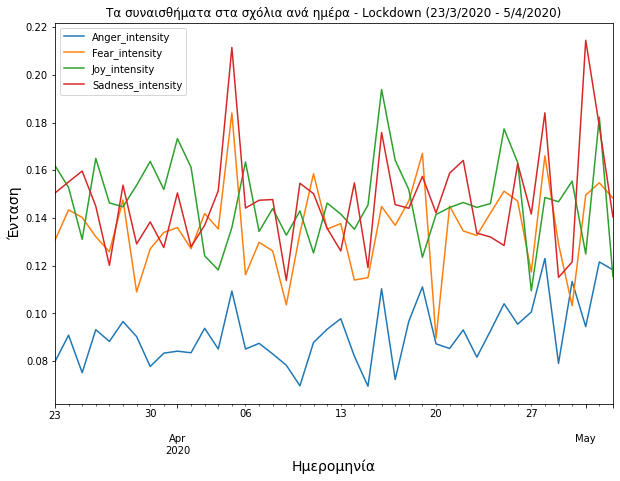

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

lockdown1 = df_news[(df_news.index>='2020-03-23')&(df_news.index<='2020-05-04')]  

lockdown1.resample('D').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα σχόλια ανά ημέρα - Lockdown (23/3/2020 - 5/4/2020)')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

Text(0, 0.5, 'Ένταση')

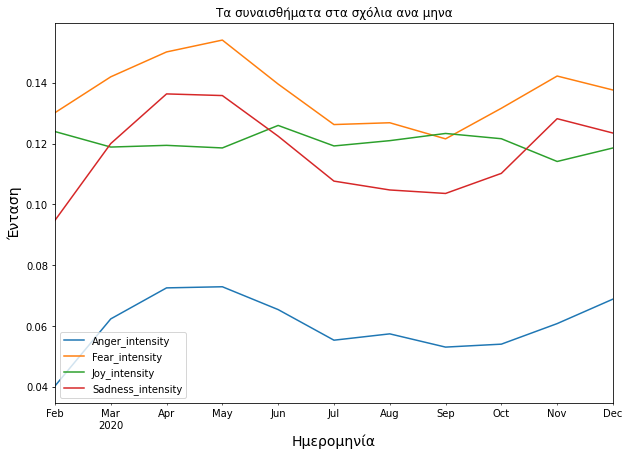

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news.resample('M').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα σχόλια ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

In [ ]:
lockdown1.resample('D').mean().plot(figsize = (10,7))


No handles with labels found to put in legend.


Text(0, 0.5, 'Scores')

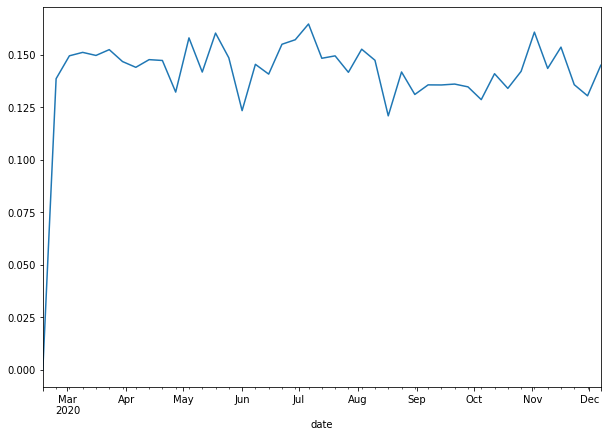

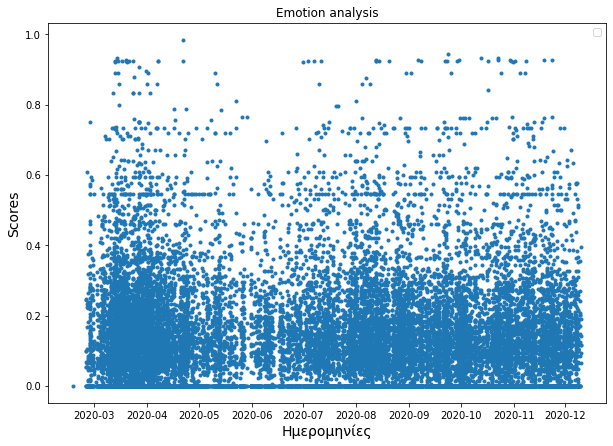

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news['Joy_intensity'].resample('7D').mean().plot(figsize = (10,7))

plt.figure(figsize = (10,7))
plt.plot(df_news['Joy_intensity'],'.')
#plt.plot(df_news['Joy_intensity'].resample(M).mean(),'r')

plt.legend()
plt.title('Emotion analysis')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Scores', fontsize=14)

#plt.hist(df_news['Joy_intensity'],'.')

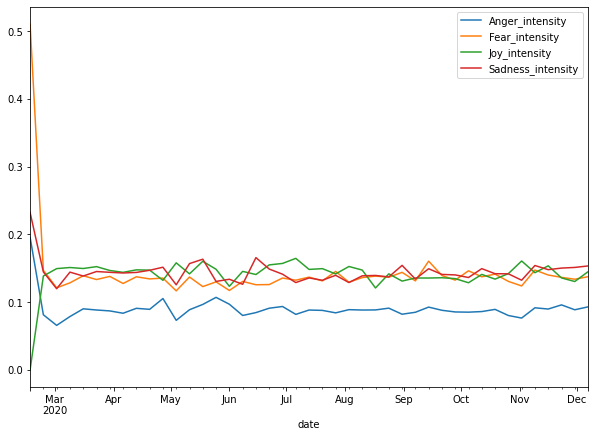

In [ ]:
df_news.resample('7D').mean().plot(figsize = (10,7)) #kinoymenos mesos 7 imerwn


Text(0, 0.5, 'Ένταση')

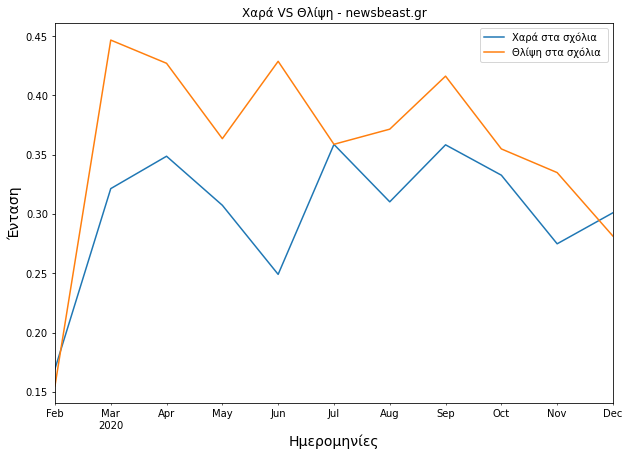

In [ ]:
df_news['Joy_intensity'].resample('M').max().plot(figsize = (10,7),label = 'Χαρά στα σχόλια ')
df_news['Sadness_intensity'].resample('M').max().plot(figsize = (10,7),label = 'Θλίψη στα σχόλια ')
plt.legend()
plt.title('Xαρά VS Θλίψη - newsbeast.gr')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

Text(0, 0.5, 'Ένταση')

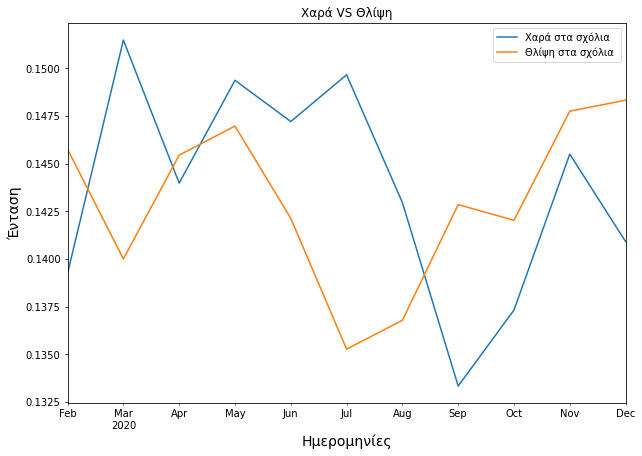

In [ ]:
df_news['Joy_intensity'].resample('M').mean().plot(figsize = (10,7),label = 'Χαρά στα σχόλια ')
df_news['Sadness_intensity'].resample('M').mean().plot(figsize = (10,7),label = 'Θλίψη στα σχόλια ')
plt.legend()
plt.title('Xαρά VS Θλίψη')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

In [ ]:
df_news['Joy_intensity'].mean()

0.14441318103112008

In [ ]:
df_news['Sadness_intensity'].mean()

0.1418316603232268

Text(0, 0.5, 'Ένταση')

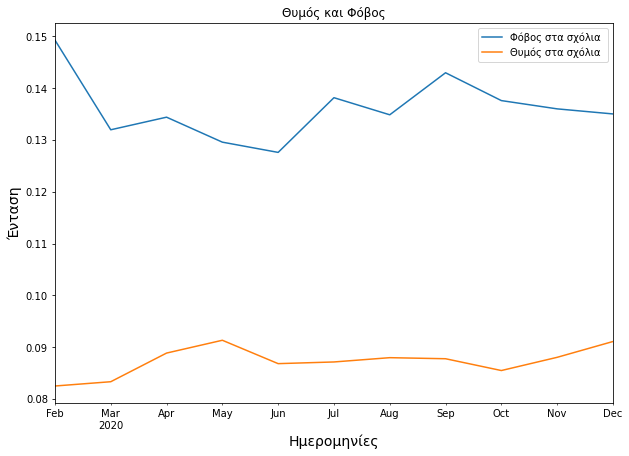

In [ ]:
df_news['Fear_intensity'].resample('M').mean().plot(figsize = (10,7),label = 'Φόβος στα σχόλια ')
df_news['Anger_intensity'].resample('M').mean().plot(figsize = (10,7),label = 'Θυμός στα σχόλια ')
plt.legend()
plt.title('Θυμός και Φόβος')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

No handles with labels found to put in legend.


Text(0, 0.5, 'Scores')

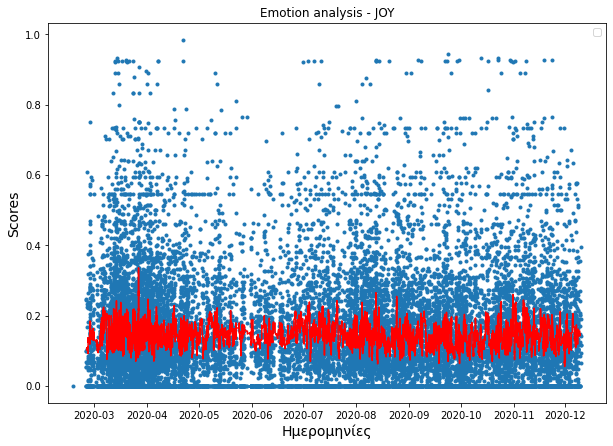

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(df_news['Joy_intensity'],'.')
#plt.plot(df_news['Joy_intensity'].resample(D).mean(),'r')
plt.plot(df_news['Joy_intensity'].rolling(30,center=True).mean(),'r')

plt.legend()
plt.title('Emotion analysis - JOY')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Scores', fontsize=14)

In [ ]:
#SAMPLE FOR VALIDATION

In [ ]:
dfsample = df_news.sample(500)
dfsample

,headline,url,date,body,comments,Sxolia,Sxolia_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
19162,Κορωνοϊός: Πρώτη χώρα σε κρούσματα παγκοσμίως...,https://www.protothema.gr/world/article/989216...,2020-03-26T21:13:00Z,Η εξάπλωση του κορωνοϊού στις Ηνωμένες Πολιτεί...,"κα , Αριθμός κρουσμάτων: είναι πλούσιες χώρ...","κα , Αριθμος κρουσματων: ειναι πλουσιες χωρ...","ΚΑ , ΑΡΙΘΜ ΚΡΟΥΣΜ : ΕΙΝΑΙ ΠΛΟΥΣ ΧΩΡ ΜΕ ΠΑ...",0.095667,0.262833,0.000000,0.280167
3416,Δραματική αύξηση των διασωληνωμένων - 31 κρού...,https://www.protothema.gr/greece/article/10590...,2020-10-26T19:16:00Z,Με εκτίναξη των διασωληνωμένων και των θανάτων...,"Ioannis , 10 άτομα δραματική αύξηση είστε τ...","Ioannis , 10 ατομα δραματικη αυξηση ειστε τ...","IOANNIS , 10 ΑΤΟΜ ΔΡΑΜΑΤ ΑΥΞΗΣ ΕΙΣΤΕ ΤΡΑΓ",0.000000,0.000000,0.000000,0.961000
23137,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"Μάνος , Δεν γίνεται με την Π.Ν.Π. να ξεκουμ...","Μανος , Δεν γινεται με την Π.Ν.Π. να ξεκουμ...","ΜΑΝ , ΔΕΝ ΓΙΝ ΜΕ ΤΗΝ Π.Ν.Π . ΝΑ ΞΕΚΟΥΜΠΙΣ...",0.230500,0.359500,0.000000,0.261750
287,Στα 1.667 τα νέα κρούσματα - 612 οι διασωληνω...,https://www.protothema.gr/greece/article/10718...,2020-12-04T15:49:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.667 νέα κρούσματα τ...,"Παναγία μου , Θα πεθάνουμε όλοι! Χανόμαστε!","Παναγια μου , Θα πεθανουμε ολοι! Χανομαστε!","ΠΑΝΑΓΙ ΜΟΥ , ΘΑ ΠΕΘΑΝ ΟΛ ! ΧΑΝ !",0.349000,0.784000,0.000000,0.859000
10823,Θεσσαλονίκη: Θετική στον κορωνοϊό νοσηλεύτρια...,https://www.protothema.gr/greece/article/10323...,2020-08-04T12:42:00Z,Συναγερμός σήμανε στο νοσοκομείο «Άγιος Δημήτρ...,"Νησιώτης , Θεσσαλονίκη Κορωνομάνα. Τους Ευρ...","Νησιωτης , Θεσσαλονικη Κορωνομανα. Τους Ευρ...","ΝΗΣΙΩΤ , ΘΕΣΣΑΛΟΝ ΚΟΡΩΝΟΜΑΝ . ΤΟΥΣ ΕΥΡΩΠΑ...",0.294000,0.429500,0.568500,0.318000
...,...,...,...,...,...,...,...,...,...,...,...
10933,Στα 77 τα νέα κρούσματα κορωνοϊού - 28 στην Α...,https://www.protothema.gr/koronoios-live/artic...,2020-08-03T15:53:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 77 νέα κρούσματα του ...,"Αγύριγο κεφάλι , Οι ΦΑΣΙΣΤΕΣ, μετά την ""Τάπ...","Αγυριγο κεφαλι , Οι ΦΑΣΙΣΤΕΣ, μετα την ""Ταπ...","ΑΓΥΡΙΓ ΚΕΦΑΛ , ΟΙ ΦΑΣΙΣΤ , ΜΕΤΑ ΤΗΝ "" ΤΑΠ...",0.036250,0.234500,0.129000,0.000000
18903,Κορωνοϊός: Έρχονται συνέχεια κρούσματα από το...,https://www.protothema.gr/koronoios-live/artic...,2020-03-28T11:08:17Z,Τη δημιουργία νέων εστιών διασποράς του κορωνο...,"Κυριακο just do it , Ολοι ειναι μεσα.ερημωσ...","Κυριακο just do it , Ολοι ειναι μεσα.ερημωσ...","ΚΥΡΙΑΚ JUST DO IT , ΟΛ ΕΙΝΑΙ ΜΕΣΑ.ΕΡΗΜΩΣΕ...",0.000000,0.000000,0.266000,0.000000
21725,Κορωνοϊός: 190 τα κρούσματα - Πέντε νοσηλεύον...,https://www.protothema.gr/koronoios-live/artic...,2020-03-13T16:26:00Z,Κατά 73 αυξήθηκαν τα κρούσματα του κορωνοϊού σ...,"Με , τα μετρα που παιρνει η κυβερνηση δεν θ...","Με , τα μετρα που παιρνει η κυβερνηση δεν θ...","ΜΕ , ΤΑ ΜΕΤΡ ΠΟΥ ΠΑΙΡΝ Η ΚΥΒΕΡΝΗΣ ΔΕΝ ΘΕΛ...",0.000000,0.059833,0.088500,0.000000
2625,«Στενεύουν τα περιθώρια» στις ΜΕΘ - Εκτινάχθη...,https://www.protothema.gr/greece/article/10620...,2020-11-04T20:29:39Z,Τη βαριά επιδημιολογική εικόνα της χώρας που ο...,"Εμμανουήλ , «Προσοχή. Ο Ραδιοφωνικός Σταθμό...","Εμμανουηλ , «Προσοχη. Ο Ραδιοφωνικος Σταθμο...","ΕΜΜΑΝΟΥΗΛ , « ΠΡΟΣΟΧ . Ο ΡΑΔΙΟΦΩΝ ΣΤΑΘΜ Α...",0.175833,0.218833,0.000000,0.173000


In [ ]:
dfsample.drop(['date', 'body', 'Sxolia_clean','Sxolia','date', 'url'], axis='columns', inplace=True)
dfsample

,headline,comments,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
19162,Κορωνοϊός: Πρώτη χώρα σε κρούσματα παγκοσμίως...,"κα , Αριθμός κρουσμάτων: είναι πλούσιες χώρ...",0.095667,0.262833,0.000000,0.280167
3416,Δραματική αύξηση των διασωληνωμένων - 31 κρού...,"Ioannis , 10 άτομα δραματική αύξηση είστε τ...",0.000000,0.000000,0.000000,0.961000
23137,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...","Μάνος , Δεν γίνεται με την Π.Ν.Π. να ξεκουμ...",0.230500,0.359500,0.000000,0.261750
287,Στα 1.667 τα νέα κρούσματα - 612 οι διασωληνω...,"Παναγία μου , Θα πεθάνουμε όλοι! Χανόμαστε!",0.349000,0.784000,0.000000,0.859000
10823,Θεσσαλονίκη: Θετική στον κορωνοϊό νοσηλεύτρια...,"Νησιώτης , Θεσσαλονίκη Κορωνομάνα. Τους Ευρ...",0.294000,0.429500,0.568500,0.318000
...,...,...,...,...,...,...
10933,Στα 77 τα νέα κρούσματα κορωνοϊού - 28 στην Α...,"Αγύριγο κεφάλι , Οι ΦΑΣΙΣΤΕΣ, μετά την ""Τάπ...",0.036250,0.234500,0.129000,0.000000
18903,Κορωνοϊός: Έρχονται συνέχεια κρούσματα από το...,"Κυριακο just do it , Ολοι ειναι μεσα.ερημωσ...",0.000000,0.000000,0.266000,0.000000
21725,Κορωνοϊός: 190 τα κρούσματα - Πέντε νοσηλεύον...,"Με , τα μετρα που παιρνει η κυβερνηση δεν θ...",0.000000,0.059833,0.088500,0.000000
2625,«Στενεύουν τα περιθώρια» στις ΜΕΘ - Εκτινάχθη...,"Εμμανουήλ , «Προσοχή. Ο Ραδιοφωνικός Σταθμό...",0.175833,0.218833,0.000000,0.173000


In [ ]:
dfsample.to_csv("/gdrive/My Drive/Colab Notebooks/FINALval500commentsPTHEMA.csv", encoding="utf-8", index=False)

In [ ]:
#BODY SENT FINAL

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
df_news = pd.read_csv("/gdrive/My Drive/Colab Notebooks/finaldfprotothema.csv")
df_news  

,Unnamed: 0,headline,url,date,body,comments
0,0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α..."
1,1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά..."
2,2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ..."
3,3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε..."
4,4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ..."
...,...,...,...,...,...,...
3000,3000,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ..."
3001,3001,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ..."
3002,3002,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ..."
3003,3003,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Α5 25/02/2020, 10:11 Μπορεί κάποιος δικηγόρος..."


In [ ]:
df_news = df_news.drop(columns=['Unnamed: 0'])


In [ ]:
df_news['body'] = df_news['body'].str.replace("Δείτε όλες τις τελευταίες Ειδήσεις από την Ελλάδα και τον Κόσμο, τη στιγμή που συμβαίνουν, στο Protothema.gr",' ')


In [ ]:
df_news['body'] = df_news['body'].str.replace('Ειδήσεις.*$', ' ') #ΣΒΗΝΩ ΑΠΌ ΤΟ ΕΙΔΗΣΕΙΣ ΣΗΜΕΡΑ ΚΑΙ ΜΕΤΑ!!!

In [ ]:
df_news.body.iloc[2]

'Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα του νέου κορωνοϊού στη χώρα, εκ των οποίων 10 εντοπίστηκαν κατόπιν ελέγχων στις πύλες εισόδου της χώρας. Ο συνολικός αριθμός των κρουσμάτων είναι 119720, εκ των οποίων το 52.7% άνδρες. Αναλυτικότερα: • 10 κρούσματα κατά τους ελέγχους που διενεργήθηκαν στις πύλες εισόδου της χώρας • 2 εισαγόμενα κρούσματα που προσήλθαν αυτοβούλως για έλεγχο • 365 κρούσματα στην Περιφέρεια Αττικής • 317 κρούσματα στην Π.Ε. Θεσσαλονίκης • 15 κρούσματα στην Π.Ε. Αιτωλοακαρνανίας • 7 κρούσματα στην Π.Ε. Αργολίδας • 3 κρούσματα στην Π.Ε. Αρκαδίας • 1 κρούσμα στην Π.Ε. Άρτας • 24 κρούσματα στην Π.Ε. Αχαΐας • 6 κρούσματα στην Π.Ε. Βοιωτίας • 15 κρούσματα στην Π.Ε. Γρεβενών • 35 κρούσματα στην Π.Ε. Δράμας • 57 κρούσματα στην Π.Ε. Έβρου • 2 κρούσματα στην Π.Ε. Εύβοιας • 6 κρούσματα στην Π.Ε. Ευρυτανίας • 4 κρούσματα στην Π.Ε. Ηλείας • 40 κρούσματα στην Π.Ε. Ημαθίας • 4 κρούσματα στην Π.Ε. Ηρακλείου • 1 κρούσμα στην Π.Ε. Θάσου • 20 κρούσματα στην Π.Ε. Ιωαννίνων • 33 κ

In [ ]:
df_news['body'] = df_news['body'].str.replace("\d\d:\d\d"," ", regex=True)


In [ ]:
df_news.body.iloc[2]

'Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα του νέου κορωνοϊού στη χώρα, εκ των οποίων 10 εντοπίστηκαν κατόπιν ελέγχων στις πύλες εισόδου της χώρας. Ο συνολικός αριθμός των κρουσμάτων είναι 119720, εκ των οποίων το 52.7% άνδρες. Αναλυτικότερα: • 10 κρούσματα κατά τους ελέγχους που διενεργήθηκαν στις πύλες εισόδου της χώρας • 2 εισαγόμενα κρούσματα που προσήλθαν αυτοβούλως για έλεγχο • 365 κρούσματα στην Περιφέρεια Αττικής • 317 κρούσματα στην Π.Ε. Θεσσαλονίκης • 15 κρούσματα στην Π.Ε. Αιτωλοακαρνανίας • 7 κρούσματα στην Π.Ε. Αργολίδας • 3 κρούσματα στην Π.Ε. Αρκαδίας • 1 κρούσμα στην Π.Ε. Άρτας • 24 κρούσματα στην Π.Ε. Αχαΐας • 6 κρούσματα στην Π.Ε. Βοιωτίας • 15 κρούσματα στην Π.Ε. Γρεβενών • 35 κρούσματα στην Π.Ε. Δράμας • 57 κρούσματα στην Π.Ε. Έβρου • 2 κρούσματα στην Π.Ε. Εύβοιας • 6 κρούσματα στην Π.Ε. Ευρυτανίας • 4 κρούσματα στην Π.Ε. Ηλείας • 40 κρούσματα στην Π.Ε. Ημαθίας • 4 κρούσματα στην Π.Ε. Ηρακλείου • 1 κρούσμα στην Π.Ε. Θάσου • 20 κρούσματα στην Π.Ε. Ιωαννίνων • 33 κ

In [ ]:
df_news['body2'] = df_news['body'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
sw = nlp.Defaults.stop_words

In [ ]:
#καθαρισμός σημείων στίξης κλπ.
def clean_text(text):
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove stop words
    text = [x for x in text if x not in sw]
    # lower text
    #text = [remove_ton(x) for x in text]
    #remove quotes
    text = [x.replace('quot;','').replace('&quot','') for x in text if x not in ['quot','amp']]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove amp & quot
    text = [x for x in text if x not in ['quot','amp']]
    # remove words with only one letter
    text = " ".join([t for t in text if len(t) > 1])
    # lemmatize text
    #text = " ".join([(t.lemma_) for t in nlp(text)])
    return(text)

In [ ]:
df_news['body_clean'] = df_news['body2'].fillna("").apply(lambda x : clean_text(x) )


In [ ]:
def removing_accents(word):
    """
    Removes accents from a given word.
    
    Parameters
    ----------
    word : str
        the word from which we want to remove the accents

    Returns
    -------
    str
        the word without accents
    """
    return (word.replace('ά', 'α').replace('έ', 'ε').replace('ή', 'η').replace('ί', 'ι').replace('ό', 'ο').replace('ύ', 'υ')
            .replace('ώ', 'ω').replace('ϊ', 'ι').replace('ϋ', 'υ').replace('ΐ', 'ι').replace('ΰ', 'υ').replace('Ά', 'Α')
            .replace('Έ', 'Ε').replace('Ή', 'Η').replace('Ί', 'Ι').replace('Ό', 'Ο').replace('Ύ', 'Υ').replace('Ϊ', 'Ι')
            .replace('Ϋ', 'Υ').upper())

In [ ]:
df_news['body_clean'] = df_news['body2'].fillna("").apply(lambda x : removing_accents(x) )

In [ ]:
def lemma(text):
    doc = nlp(text)
    lemmatized_token= " ".join([token.lemma_ for token in doc])
    return(lemmatized_token)

In [ ]:
df_news

,headline,url,date,body,comments,body2,body_clean
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α...",Στερεη και ανθεκτικη παραμενει η αλυσιδα της μ...,ΣΤΕΡΕΗ ΚΑΙ ΑΝΘΕΚΤΙΚΗ ΠΑΡΑΜΕΝΕΙ Η ΑΛΥΣΙΔΑ ΤΗΣ Μ...
1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά...","Τεσσερα κρουσματα κορωνοϊου, εντοπιστηκαν στο ...","ΤΕΣΣΕΡΑ ΚΡΟΥΣΜΑΤΑ ΚΟΡΩΝΟΙΟΥ, ΕΝΤΟΠΙΣΤΗΚΑΝ ΣΤΟ ..."
2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ...",Ο ΕΟΔΥ ανακοινωσε σημερα 1.677 νεα κρουσματα τ...,Ο ΕΟΔΥ ΑΝΑΚΟΙΝΩΣΕ ΣΗΜΕΡΑ 1.677 ΝΕΑ ΚΡΟΥΣΜΑΤΑ Τ...
3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε...","Ειναι γεγονος οτι υπαρχει βελτιωση, αυτη η βελ...","ΕΙΝΑΙ ΓΕΓΟΝΟΣ ΟΤΙ ΥΠΑΡΧΕΙ ΒΕΛΤΙΩΣΗ, ΑΥΤΗ Η ΒΕΛ..."
4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ...",Έφυγε απο την ζωη 51χρονη διοικητικη υπαλληλος...,ΕΦΥΓΕ ΑΠΟ ΤΗΝ ΖΩΗ 51ΧΡΟΝΗ ΔΙΟΙΚΗΤΙΚΗ ΥΠΑΛΛΗΛΟΣ...
...,...,...,...,...,...,...,...
3000,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ...",Στην Εφημεριδα της Κυβερνησεως δημοσιευτηκε τ...,ΣΤΗΝ ΕΦΗΜΕΡΙΔΑ ΤΗΣ ΚΥΒΕΡΝΗΣΕΩΣ ΔΗΜΟΣΙΕΥΤΗΚΕ Τ...
3001,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ...",Σε εγρηγορση βρισκονται οι ελληνικες υγειονομ...,ΣΕ ΕΓΡΗΓΟΡΣΗ ΒΡΙΣΚΟΝΤΑΙ ΟΙ ΕΛΛΗΝΙΚΕΣ ΥΓΕΙΟΝΟΜ...
3002,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ...",Σε αυξημενη επιφυλακη βρισκεται η κυβερνηση κ...,ΣΕ ΑΥΞΗΜΕΝΗ ΕΠΙΦΥΛΑΚΗ ΒΡΙΣΚΕΤΑΙ Η ΚΥΒΕΡΝΗΣΗ Κ...
3003,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Α5 25/02/2020, 10:11 Μπορεί κάποιος δικηγόρος...",Ψυχραιμια αλλα οχι εφησυχασμο συστηνουν οι Έλ...,ΨΥΧΡΑΙΜΙΑ ΑΛΛΑ ΟΧΙ ΕΦΗΣΥΧΑΣΜΟ ΣΥΣΤΗΝΟΥΝ ΟΙ ΕΛ...


In [ ]:
df_news['body_clean'].fillna("").apply(lambda x : lemma(x) )

0       στερεη και ανθεκτικη παραμενει η αλυσιδας της ...
1       τεσσερα κρουσματας κορωνοιου , εντοπιστηκαν στ...
2       ο εοδυ ανακοινωσε σημερα 1.677 νεος κρουσματας...
3       ειναι γεγονο οτι υπαρχει βελτιωση , αυτη η βελ...
4       εφυγε απο την ζωη 51χρονη διοικητικη υπαλληλο ...
                              ...                        
3000      στην εφημεριδο της κυβερνησεω δημοσιευτηκε τ...
3001      σε εγρηγορση βρισκονται οι ελληνικες υγειονο...
3002      σε αυξημενη επιφυλακη βρισκεται η κυβερνηση ...
3003      ψυχραιμι ΑΛΛΑ οχι εφησυχασμο συστηνουν οι ελ...
3004      xιλιαδες ειναι οι ανθρωποι πο βγηκαν ΝΙΚΗΤΕΣ...
Name: body_clean, Length: 3005, dtype: object

In [ ]:
!pip3 install greek_stemmer 

In [ ]:
from greek_stemmer import GreekStemmer
stemmer = GreekStemmer()

stop_words = nlp.Defaults.stop_words
stop_words |= {'.',',',';','?',':','!',' ','&','/','ή','-','(',')','[',']','{','}','"','"','`','~','\xa0','αυτώ'}

In [ ]:
t = nlp('εισαγγελεας εισαγγελεων εισαγγελεις'.upper())
for token in t:
    print(token.text,token.lemma_,stemmer.stem(token.text))

ΕΙΣΑΓΓΕΛΕΑΣ εισαγγελεα ΕΙΣΑΓΓΕΛ
ΕΙΣΑΓΓΕΛΕΩΝ εισαγγελεος ΕΙΣΑΓΓΕΛ
ΕΙΣΑΓΓΕΛΕΙΣ εισαγγελει ΕΙΣΑΓΓΕΛ


In [ ]:
def stemming(word):
   
    t = nlp(word.upper())
    for token in t:
        print(token.text,token.lemma_,
            stemmer.stem(token.text))
    return " ".join([stemmer.stem(t.text)  for t in nlp(word.upper())]) 
    return stemmer.stem((removing_accents(word)).upper())

In [ ]:
df_news.head()

,headline,url,date,body,comments,body2,body_clean
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α...",Στερεη και ανθεκτικη παραμενει η αλυσιδα της μ...,ΣΤΕΡΕΗ ΚΑΙ ΑΝΘΕΚΤΙΚΗ ΠΑΡΑΜΕΝΕΙ Η ΑΛΥΣΙΔΑ ΤΗΣ Μ...
1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά...","Τεσσερα κρουσματα κορωνοϊου, εντοπιστηκαν στο ...","ΤΕΣΣΕΡΑ ΚΡΟΥΣΜΑΤΑ ΚΟΡΩΝΟΙΟΥ, ΕΝΤΟΠΙΣΤΗΚΑΝ ΣΤΟ ..."
2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ...",Ο ΕΟΔΥ ανακοινωσε σημερα 1.677 νεα κρουσματα τ...,Ο ΕΟΔΥ ΑΝΑΚΟΙΝΩΣΕ ΣΗΜΕΡΑ 1.677 ΝΕΑ ΚΡΟΥΣΜΑΤΑ Τ...
3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε...","Ειναι γεγονος οτι υπαρχει βελτιωση, αυτη η βελ...","ΕΙΝΑΙ ΓΕΓΟΝΟΣ ΟΤΙ ΥΠΑΡΧΕΙ ΒΕΛΤΙΩΣΗ, ΑΥΤΗ Η ΒΕΛ..."
4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ...",Έφυγε απο την ζωη 51χρονη διοικητικη υπαλληλος...,ΕΦΥΓΕ ΑΠΟ ΤΗΝ ΖΩΗ 51ΧΡΟΝΗ ΔΙΟΙΚΗΤΙΚΗ ΥΠΑΛΛΗΛΟΣ...


In [ ]:
df_news['body_clean'] = df_news['body_clean'].apply(lambda x : stemming(x) )


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
ΝΑ να ΝΑ
ΕΚΔΟΣΕΙ εκδοσω ΕΚΔΟΣ
ΑΠΟΤΕΛΕΣΜΑΤΑ αποτελεσματα ΑΠΟΤΕΛΕΣΜ
ΤΟ το ΤΟ
ΤΑΧΥΤΕΡΟ ταχυτερο ΤΑΧ
ΔΥΝΑΤΟΝ δυνατον ΔΥΝΑΤΟΝ
. . .
ΠΡΟΣ προς ΠΡΟΣ
ΕΝΙΣΧΥΣΗ ενισχυση ΕΝΙΣΧΥΣ
ΤΗΣ της ΤΗΣ
ΕΤΟΙΜΟΤΗΤΑΣ ετοιμοτητα ΕΤΟΙΜΟΤΗΤ
ΤΗΣ της ΤΗΣ
ΧΩΡΑΣ χωρα ΧΩΡ
, , ,
Η η Η
ΕΠΙΤΡΟΠΗ επιτροπη ΕΠΙΤΡΟΠ
ΤΩΝ των ΤΩΝ
ΛΟΙΜΩΞΙΟΛΟΓΩΝ ΛΟΙΜΩΞΙΟΛΟΓΩΝ ΛΟΙΜΩΞΙΟΛΟΓ
ΤΟΥ τος ΤΟΥ
ΥΠΟΥΡΓΕΙΟΥ υπουργειο ΥΠΟΥΡΓΕΙ
ΥΓΕΙΑΣ υγεια ΥΓΕΙ
ΒΡΙΣΚΕΤΑΙ ΒΡΙΣΚΕΤΑΙ ΒΡΙΣΚ
ΣΕ σε ΣΕ
ΔΙΑΡΚΗ διαρκη ΔΙΑΡΚ
ΕΠΙΚΟΙΝΩΝΙΑ επικοινωνι ΕΠΙΚΟΙΝΩΝ
ΜΕ με ΜΕ
ΤΟ το ΤΟ
ΙΑΤΡΙΚΟ ιατρικος ΙΑΤΡ
ΠΡΟΣΩΠΙΚΟ προσωπικο ΠΡΟΣΩΠ
ΤΩΝ των ΤΩΝ
« « «
ΝΟΣΟΚΟΜΕΙΩΝ νοσοκομεια ΝΟΣΟΚΟΜΕΙ
ΑΝΑΦΟΡΑΣ αναφορα ΑΝΑΦΟΡ
» » »
ΩΣΤΕ ωστε ΩΣΤΕ
ΝΑ να ΝΑ
ΓΙΝΕΤΑΙ γινεται ΓΙΝ
ΔΙΑΧΥΣΗ διαχυση ΔΙΑΧΥΣ
ΤΗΣ της ΤΗΣ
ΕΠΙΣΤΗΜΟΝΙΚΗΣ επιστημονικη ΕΠΙΣΤΗΜΟΝ
ΠΛΗΡΟΦΟΡΙΑΣ πληροφορια ΠΛΗΡΟΦΟΡ
ΜΕ με ΜΕ
ΣΤΟΧΟ ΣΤΟΧΟ ΣΤΟΧ
ΤΗΝ την ΤΗΝ
ΚΑΛΥΤΕΡΗ καλυτερη ΚΑΛ
ΔΥΝΑΤΗ δυνατη ΔΥΝΑΤ
ΑΝΤΙΜΕΤΩΠΙΣΗ αντιμετωπιση ΑΝΤΙΜΕΤΩΠΙΣ
ΕΝΟΣ ενο ΕΝ
« « «
ΠΡΑΓΜΑΤΙΚΟΥ πραγματικο ΠΡΑΓΜΑΤ
» » 

In [ ]:
df_news.to_csv("/gdrive/My Drive/Colab Notebooks/pthemaBODY_cleanednosent.csv")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
df_news = pd.read_csv("/gdrive/My Drive/Colab Notebooks/pthemaBODY_cleanednosent.csv")
df_news

,Unnamed: 0,headline,url,date,body,comments,body2,body_clean
0,0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α...",Στερεη και ανθεκτικη παραμενει η αλυσιδα της μ...,ΣΤΕΡΕ ΚΑΙ ΑΝΘΕΚΤ ΠΑΡΑΜΕΝ Η ΑΛΥΣΙΔ ΤΗΣ ΜΕΤΑΔΟΣ ...
1,1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά...","Τεσσερα κρουσματα κορωνοϊου, εντοπιστηκαν στο ...","ΤΕΣΣΕΡ ΚΡΟΥΣΜ ΚΟΡΩΝΟΙ , ΕΝΤΟΠΙΣΤ ΣΤ ΑΣΥΛ ΑΝΙΑΤ..."
2,2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ...",Ο ΕΟΔΥ ανακοινωσε σημερα 1.677 νεα κρουσματα τ...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΣΗΜΕΡ 1.677 ΝΕ ΚΡΟΥΣΜ ΤΟΥ ΝΕ Κ...
3,3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε...","Ειναι γεγονος οτι υπαρχει βελτιωση, αυτη η βελ...","ΕΙΝΑΙ ΓΕΓΟΝ ΟΤΙ ΥΠΑΡΧ ΒΕΛΤΙΩΣ , ΑΥΤ Η ΒΕΛΤΙΩΣ ..."
4,4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ...",Έφυγε απο την ζωη 51χρονη διοικητικη υπαλληλος...,ΕΦΥΓ ΑΠΟ ΤΗΝ ΖΩ 51ΧΡΟΝΗ ΔΙΟΙΚΗΤ ΥΠΑΛΛΗΛ ΤΟΥ ΝΟ...
...,...,...,...,...,...,...,...,...
3000,3000,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ...",Στην Εφημεριδα της Κυβερνησεως δημοσιευτηκε τ...,ΣΤΗΝ ΕΦΗΜΕΡΙΔ ΤΗΣ ΚΥΒΕΡΝΗΣ ΔΗΜΟΣΙΕΥΤ ΤΗΝ ΤΡΙ...
3001,3001,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ...",Σε εγρηγορση βρισκονται οι ελληνικες υγειονομ...,ΣΕ ΕΓΡΗΓΟΡΣ ΒΡΙΣΚ ΟΙ ΕΛΛΗΝ ΥΓΕΙΟΝΟΜ ΑΡΧ ΚΑΘΩ...
3002,3002,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ...",Σε αυξημενη επιφυλακη βρισκεται η κυβερνηση κ...,ΣΕ ΑΥΞΗΜΕΝ ΕΠΙΦΥΛΑΚ ΒΡΙΣΚ Η ΚΥΒΕΡΝΗΣ ΚΑΙ ΟΙ ...
3003,3003,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Α5 25/02/2020, 10:11 Μπορεί κάποιος δικηγόρος...",Ψυχραιμια αλλα οχι εφησυχασμο συστηνουν οι Έλ...,ΨΥΧΡΑΙΜ ΑΛΛΑ ΟΧΙ ΕΦΗΣΥΧΑΣΜ ΣΥΣΤΗΝ ΟΙ ΕΛΛΗΝ Λ...


In [ ]:
AIL_df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/AIL_df.csv")

In [ ]:
AIL_df.drop_duplicates(subset=['term','AffectDimension'], keep='first', inplace = True)
AIL_df.reset_index(drop=True, inplace = True)

In [ ]:
AIL_df

,term,score,AffectDimension
0,ΕΞΟΡΓΙΣΜΕΝ,0.964,anger
1,ΚΤΗΝΩΔ,0.959,anger
2,ΕΧΘΡ,0.953,anger
3,ΜΙΣΗΤ,0.940,anger
4,ΤΡΟΜΟΚΡΑΤ,0.939,anger
...,...,...,...
7713,ΨΕΥΔ,0.164,trust
7714,ΦΥΓ,0.141,trust
7715,ΔΙΑΖΥΓ,0.133,trust
7716,ΔΟΛΩΜ,0.133,trust


In [ ]:
#anger
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_anger_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[0]

get_anger_score('ΕΞΟΡΓΙΣΜΕΝ')

0.964

In [ ]:
df_news ['Anger_intensity'] = df_news['body_clean'].fillna("").apply(lambda x: get_anger_score(x))

In [ ]:
#fear

w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_fear_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[3]


get_fear_score('ΦΟΒ')

0.8590000000000001

In [ ]:
df_news ['Fear_intensity'] = df_news['body_clean'].fillna("").apply(lambda x: get_fear_score(x))


In [ ]:
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_joy_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[4]

get_joy_score('ΧΑΡ')

0.924

In [ ]:
df_news ['Joy_intensity'] = df_news['body_clean'].fillna("").apply(lambda x: get_joy_score(x))


In [ ]:
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,anticipation, disgust,fear,joy,sadness, surprise, trust in df[['w','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise', 'trust']].values:
    w2affects[w] = {'anger':anger,'anticipation':anticipation,'disgust':disgust,'fear':fear, 'joy':joy,'sadness':sadness, 'surprise':surprise, 'trust': trust}

def get_sadness_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        #w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return np.nan
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[5]

get_sadness_score('ΠΕΝΘ')

0.969

In [ ]:
df_news ['Sadness_intensity'] = df_news['body_clean'].fillna("").apply(lambda x: get_sadness_score(x))


In [ ]:
cols = [ 'Anger_intensity', 'Joy_intensity', 'Sadness_intensity',
       'Fear_intensity']
df_news[cols] = df_news[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
df_news[cols].dropna(inplace=False)

,Anger_intensity,Joy_intensity,Sadness_intensity,Fear_intensity
0,0.034297,0.162849,0.082879,0.097259
1,0.090867,0.132133,0.143733,0.227067
2,0.062473,0.152530,0.083150,0.100807
3,0.046467,0.107533,0.032300,0.070833
4,0.083813,0.096531,0.178187,0.104406
...,...,...,...,...
3000,0.045370,0.109017,0.078555,0.119353
3001,0.028794,0.113817,0.061278,0.096672
3002,0.051638,0.084384,0.103795,0.124067
3003,0.032860,0.109736,0.045298,0.086058


In [ ]:
index_col = df_news[(df_news['Anger_intensity'] >= 0) & (df_news['Fear_intensity'] <= 0) & (df_news['Joy_intensity'] <= 0)& (df_news['Sadness_intensity'] <= 0)].index 
df_news.drop(index_col, inplace = True) 
df_news

,headline,url,date,body,comments,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α...",Στερεη και ανθεκτικη παραμενει η αλυσιδα της μ...,ΣΤΕΡΕ ΚΑΙ ΑΝΘΕΚΤ ΠΑΡΑΜΕΝ Η ΑΛΥΣΙΔ ΤΗΣ ΜΕΤΑΔΟΣ ...,0.034297,0.097259,0.162849,0.082879
1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά...","Τεσσερα κρουσματα κορωνοϊου, εντοπιστηκαν στο ...","ΤΕΣΣΕΡ ΚΡΟΥΣΜ ΚΟΡΩΝΟΙ , ΕΝΤΟΠΙΣΤ ΣΤ ΑΣΥΛ ΑΝΙΑΤ...",0.090867,0.227067,0.132133,0.143733
2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ...",Ο ΕΟΔΥ ανακοινωσε σημερα 1.677 νεα κρουσματα τ...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΣΗΜΕΡ 1.677 ΝΕ ΚΡΟΥΣΜ ΤΟΥ ΝΕ Κ...,0.062473,0.100807,0.152530,0.083150
3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε...","Ειναι γεγονος οτι υπαρχει βελτιωση, αυτη η βελ...","ΕΙΝΑΙ ΓΕΓΟΝ ΟΤΙ ΥΠΑΡΧ ΒΕΛΤΙΩΣ , ΑΥΤ Η ΒΕΛΤΙΩΣ ...",0.046467,0.070833,0.107533,0.032300
4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ...",Έφυγε απο την ζωη 51χρονη διοικητικη υπαλληλος...,ΕΦΥΓ ΑΠΟ ΤΗΝ ΖΩ 51ΧΡΟΝΗ ΔΙΟΙΚΗΤ ΥΠΑΛΛΗΛ ΤΟΥ ΝΟ...,0.083813,0.104406,0.096531,0.178187
...,...,...,...,...,...,...,...,...,...,...,...
3000,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ...",Στην Εφημεριδα της Κυβερνησεως δημοσιευτηκε τ...,ΣΤΗΝ ΕΦΗΜΕΡΙΔ ΤΗΣ ΚΥΒΕΡΝΗΣ ΔΗΜΟΣΙΕΥΤ ΤΗΝ ΤΡΙ...,0.045370,0.119353,0.109017,0.078555
3001,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ...",Σε εγρηγορση βρισκονται οι ελληνικες υγειονομ...,ΣΕ ΕΓΡΗΓΟΡΣ ΒΡΙΣΚ ΟΙ ΕΛΛΗΝ ΥΓΕΙΟΝΟΜ ΑΡΧ ΚΑΘΩ...,0.028794,0.096672,0.113817,0.061278
3002,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ...",Σε αυξημενη επιφυλακη βρισκεται η κυβερνηση κ...,ΣΕ ΑΥΞΗΜΕΝ ΕΠΙΦΥΛΑΚ ΒΡΙΣΚ Η ΚΥΒΕΡΝΗΣ ΚΑΙ ΟΙ ...,0.051638,0.124067,0.084384,0.103795
3003,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Α5 25/02/2020, 10:11 Μπορεί κάποιος δικηγόρος...",Ψυχραιμια αλλα οχι εφησυχασμο συστηνουν οι Έλ...,ΨΥΧΡΑΙΜ ΑΛΛΑ ΟΧΙ ΕΦΗΣΥΧΑΣΜ ΣΥΣΤΗΝ ΟΙ ΕΛΛΗΝ Λ...,0.032860,0.086058,0.109736,0.045298


In [ ]:
df_news.to_csv("/gdrive/My Drive/Colab Notebooks/FINALPTHEMAsentiment_bodyall.csv", encoding="utf-8", index=False)


In [ ]:
df_news = pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINALPTHEMAsentiment_bodyall.csv")
df_news

,headline,url,date,body,comments,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α...",Στερεη και ανθεκτικη παραμενει η αλυσιδα της μ...,ΣΤΕΡΕ ΚΑΙ ΑΝΘΕΚΤ ΠΑΡΑΜΕΝ Η ΑΛΥΣΙΔ ΤΗΣ ΜΕΤΑΔΟΣ ...,0.034297,0.097259,0.162849,0.082879
1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά...","Τεσσερα κρουσματα κορωνοϊου, εντοπιστηκαν στο ...","ΤΕΣΣΕΡ ΚΡΟΥΣΜ ΚΟΡΩΝΟΙ , ΕΝΤΟΠΙΣΤ ΣΤ ΑΣΥΛ ΑΝΙΑΤ...",0.090867,0.227067,0.132133,0.143733
2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ...",Ο ΕΟΔΥ ανακοινωσε σημερα 1.677 νεα κρουσματα τ...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΣΗΜΕΡ 1.677 ΝΕ ΚΡΟΥΣΜ ΤΟΥ ΝΕ Κ...,0.062473,0.100807,0.152530,0.083150
3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε...","Ειναι γεγονος οτι υπαρχει βελτιωση, αυτη η βελ...","ΕΙΝΑΙ ΓΕΓΟΝ ΟΤΙ ΥΠΑΡΧ ΒΕΛΤΙΩΣ , ΑΥΤ Η ΒΕΛΤΙΩΣ ...",0.046467,0.070833,0.107533,0.032300
4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ...",Έφυγε απο την ζωη 51χρονη διοικητικη υπαλληλος...,ΕΦΥΓ ΑΠΟ ΤΗΝ ΖΩ 51ΧΡΟΝΗ ΔΙΟΙΚΗΤ ΥΠΑΛΛΗΛ ΤΟΥ ΝΟ...,0.083813,0.104406,0.096531,0.178187
...,...,...,...,...,...,...,...,...,...,...,...
2999,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ...",Στην Εφημεριδα της Κυβερνησεως δημοσιευτηκε τ...,ΣΤΗΝ ΕΦΗΜΕΡΙΔ ΤΗΣ ΚΥΒΕΡΝΗΣ ΔΗΜΟΣΙΕΥΤ ΤΗΝ ΤΡΙ...,0.045370,0.119353,0.109017,0.078555
3000,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ...",Σε εγρηγορση βρισκονται οι ελληνικες υγειονομ...,ΣΕ ΕΓΡΗΓΟΡΣ ΒΡΙΣΚ ΟΙ ΕΛΛΗΝ ΥΓΕΙΟΝΟΜ ΑΡΧ ΚΑΘΩ...,0.028794,0.096672,0.113817,0.061278
3001,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ...",Σε αυξημενη επιφυλακη βρισκεται η κυβερνηση κ...,ΣΕ ΑΥΞΗΜΕΝ ΕΠΙΦΥΛΑΚ ΒΡΙΣΚ Η ΚΥΒΕΡΝΗΣ ΚΑΙ ΟΙ ...,0.051638,0.124067,0.084384,0.103795
3002,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Α5 25/02/2020, 10:11 Μπορεί κάποιος δικηγόρος...",Ψυχραιμια αλλα οχι εφησυχασμο συστηνουν οι Έλ...,ΨΥΧΡΑΙΜ ΑΛΛΑ ΟΧΙ ΕΦΗΣΥΧΑΣΜ ΣΥΣΤΗΝ ΟΙ ΕΛΛΗΝ Λ...,0.032860,0.086058,0.109736,0.045298


In [ ]:
import dateutil.parser

d = dateutil.parser.parse('2008-09-26T01:51:42.000Z')
print(d.strftime('%m/%d/%Y'))  

09/26/2008


In [ ]:
df_news['Date'] = pd.to_datetime(df_news['date'])


In [ ]:
#df_news['Date'] = pd.to_datetime(df_news['date'], errors='raise', dayfirst=False, yearfirst=True, utc=None, format="%Y-%m-%dT%H:%M:%S.%f" , exact=True, unit=None, infer_datetime_format=False)
df_news

,headline,url,date,body,comments,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity,Date
0,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α...",Στερεη και ανθεκτικη παραμενει η αλυσιδα της μ...,ΣΤΕΡΕ ΚΑΙ ΑΝΘΕΚΤ ΠΑΡΑΜΕΝ Η ΑΛΥΣΙΔ ΤΗΣ ΜΕΤΑΔΟΣ ...,0.034297,0.097259,0.162849,0.082879,2020-12-10 04:21:00+00:00
1,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά...","Τεσσερα κρουσματα κορωνοϊου, εντοπιστηκαν στο ...","ΤΕΣΣΕΡ ΚΡΟΥΣΜ ΚΟΡΩΝΟΙ , ΕΝΤΟΠΙΣΤ ΣΤ ΑΣΥΛ ΑΝΙΑΤ...",0.090867,0.227067,0.132133,0.143733,2020-12-09 18:15:00+00:00
2,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ...",Ο ΕΟΔΥ ανακοινωσε σημερα 1.677 νεα κρουσματα τ...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΣΗΜΕΡ 1.677 ΝΕ ΚΡΟΥΣΜ ΤΟΥ ΝΕ Κ...,0.062473,0.100807,0.152530,0.083150,2020-12-09 15:38:00+00:00
3,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε...","Ειναι γεγονος οτι υπαρχει βελτιωση, αυτη η βελ...","ΕΙΝΑΙ ΓΕΓΟΝ ΟΤΙ ΥΠΑΡΧ ΒΕΛΤΙΩΣ , ΑΥΤ Η ΒΕΛΤΙΩΣ ...",0.046467,0.070833,0.107533,0.032300,2020-12-09 13:31:00+00:00
4,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ...",Έφυγε απο την ζωη 51χρονη διοικητικη υπαλληλος...,ΕΦΥΓ ΑΠΟ ΤΗΝ ΖΩ 51ΧΡΟΝΗ ΔΙΟΙΚΗΤ ΥΠΑΛΛΗΛ ΤΟΥ ΝΟ...,0.083813,0.104406,0.096531,0.178187,2020-12-09 11:50:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2999,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ...",Στην Εφημεριδα της Κυβερνησεως δημοσιευτηκε τ...,ΣΤΗΝ ΕΦΗΜΕΡΙΔ ΤΗΣ ΚΥΒΕΡΝΗΣ ΔΗΜΟΣΙΕΥΤ ΤΗΝ ΤΡΙ...,0.045370,0.119353,0.109017,0.078555,2020-02-26 08:14:00+00:00
3000,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ...",Σε εγρηγορση βρισκονται οι ελληνικες υγειονομ...,ΣΕ ΕΓΡΗΓΟΡΣ ΒΡΙΣΚ ΟΙ ΕΛΛΗΝ ΥΓΕΙΟΝΟΜ ΑΡΧ ΚΑΘΩ...,0.028794,0.096672,0.113817,0.061278,2020-02-26 04:09:00+00:00
3001,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ...",Σε αυξημενη επιφυλακη βρισκεται η κυβερνηση κ...,ΣΕ ΑΥΞΗΜΕΝ ΕΠΙΦΥΛΑΚ ΒΡΙΣΚ Η ΚΥΒΕΡΝΗΣ ΚΑΙ ΟΙ ...,0.051638,0.124067,0.084384,0.103795,2020-02-25 17:04:00+00:00
3002,"Κορωνοϊός: Ψυχραιμία, πρόληψη και όχι εφησυχα...",https://www.protothema.gr/greece/article/97827...,2020-02-25T04:28:00Z,Ψυχραιμία αλλά όχι εφησυχασμό συστήνουν οι Έλ...,"Α5 25/02/2020, 10:11 Μπορεί κάποιος δικηγόρος...",Ψυχραιμια αλλα οχι εφησυχασμο συστηνουν οι Έλ...,ΨΥΧΡΑΙΜ ΑΛΛΑ ΟΧΙ ΕΦΗΣΥΧΑΣΜ ΣΥΣΤΗΝ ΟΙ ΕΛΛΗΝ Λ...,0.032860,0.086058,0.109736,0.045298,2020-02-25 04:28:00+00:00


In [ ]:
df_news.set_index(df_news['Date'],inplace=True)
df_news

,headline,url,date,body,comments,body2,body_clean,Anger_intensity,Fear_intensity,Joy_intensity,Sadness_intensity,Date
Date,,,,,,,,,,,,
2020-12-10 04:21:00+00:00,Κρούσματα κορωνοϊού σε 50 περιοχές - Απαγορευ...,https://www.protothema.gr/greece/article/10734...,2020-12-10T04:21:00Z,Στέρεη και ανθεκτική παραμένει η αλυσίδα της μ...,"Πόση 10/12/2020, 12:50 βλακεία πιά...με την Α...",Στερεη και ανθεκτικη παραμενει η αλυσιδα της μ...,ΣΤΕΡΕ ΚΑΙ ΑΝΘΕΚΤ ΠΑΡΑΜΕΝ Η ΑΛΥΣΙΔ ΤΗΣ ΜΕΤΑΔΟΣ ...,0.034297,0.097259,0.162849,0.082879,2020-12-10 04:21:00+00:00
2020-12-09 18:15:00+00:00,Πάτρα: Τέσσερα κρούσματα κορωνοϊού σε Άσυλο Α...,https://www.protothema.gr/greece/article/10734...,2020-12-09T18:15:00Z,"Τέσσερα κρούσματα κορωνοϊού, εντοπίστηκαν στο ...","Πυργιώτης 09/12/2020, 20:31 Τι πρωτόκολλο εφά...","Τεσσερα κρουσματα κορωνοϊου, εντοπιστηκαν στο ...","ΤΕΣΣΕΡ ΚΡΟΥΣΜ ΚΟΡΩΝΟΙ , ΕΝΤΟΠΙΣΤ ΣΤ ΑΣΥΛ ΑΝΙΑΤ...",0.090867,0.227067,0.132133,0.143733,2020-12-09 18:15:00+00:00
2020-12-09 15:38:00+00:00,Στα 1.677 τα νέα κρούσματα - 578 διασωληνωμέν...,https://www.protothema.gr/koronoios-live/artic...,2020-12-09T15:38:00Z,Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.677 νέα κρούσματα τ...,"karantinatos 09/12/2020, 21:24 Άντε και του χ...",Ο ΕΟΔΥ ανακοινωσε σημερα 1.677 νεα κρουσματα τ...,Ο ΕΟΔ ΑΝΑΚΟΙΝΩΣ ΣΗΜΕΡ 1.677 ΝΕ ΚΡΟΥΣΜ ΤΟΥ ΝΕ Κ...,0.062473,0.100807,0.152530,0.083150,2020-12-09 15:38:00+00:00
2020-12-09 13:31:00+00:00,"Δεν βλέπουμε την αναμενόμενη βελτίωση, λέει ο...",https://www.protothema.gr/greece/article/10733...,2020-12-09T13:31:00Z,"Είναι γεγονός ότι υπάρχει βελτίωση, αυτή η βελ...","Μα... πώς Μανώλη; 10/12/2020, 14:19 Αφού οι ε...","Ειναι γεγονος οτι υπαρχει βελτιωση, αυτη η βελ...","ΕΙΝΑΙ ΓΕΓΟΝ ΟΤΙ ΥΠΑΡΧ ΒΕΛΤΙΩΣ , ΑΥΤ Η ΒΕΛΤΙΩΣ ...",0.046467,0.070833,0.107533,0.032300,2020-12-09 13:31:00+00:00
2020-12-09 11:50:00+00:00,Έχασε τη μάχη με τον κορωνοϊό 51χρονη διοικητ...,https://www.protothema.gr/greece/article/10732...,2020-12-09T11:50:00Z,Έφυγε από την ζωή 51χρονη διοικητική υπάλληλος...,"mm 09/12/2020, 17:48 συλληπητηρια. στη χωρα μ...",Έφυγε απο την ζωη 51χρονη διοικητικη υπαλληλος...,ΕΦΥΓ ΑΠΟ ΤΗΝ ΖΩ 51ΧΡΟΝΗ ΔΙΟΙΚΗΤ ΥΠΑΛΛΗΛ ΤΟΥ ΝΟ...,0.083813,0.104406,0.096531,0.178187,2020-12-09 11:50:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-26 08:14:00+00:00,"Κορωνοϊός: Πότε θα κλείνουν σχολεία, λιμάνια,...",https://www.protothema.gr/greece/article/97873...,2020-02-26T08:14:00Z,Στην Εφημερίδα της Κυβερνήσεως δημοσιεύτηκε τ...,"kyriakos 26/02/2020, 14:13 Είπαμε ΠΡΙΝ ΑΠΌ ΠΟ...",Στην Εφημεριδα της Κυβερνησεως δημοσιευτηκε τ...,ΣΤΗΝ ΕΦΗΜΕΡΙΔ ΤΗΣ ΚΥΒΕΡΝΗΣ ΔΗΜΟΣΙΕΥΤ ΤΗΝ ΤΡΙ...,0.045370,0.119353,0.109017,0.078555,2020-02-26 08:14:00+00:00
2020-02-26 04:09:00+00:00,Κορωνοϊός: Αγωνία για το ύποπτο κρούσμα στο «...,https://www.protothema.gr/greece/article/97865...,2020-02-26T04:09:00Z,Σε εγρήγορση βρίσκονται οι ελληνικές υγειονομ...,"αυτο το πρωτο κρουσμα; 26/02/2020, 11:24 Πολύ...",Σε εγρηγορση βρισκονται οι ελληνικες υγειονομ...,ΣΕ ΕΓΡΗΓΟΡΣ ΒΡΙΣΚ ΟΙ ΕΛΛΗΝ ΥΓΕΙΟΝΟΜ ΑΡΧ ΚΑΘΩ...,0.028794,0.096672,0.113817,0.061278,2020-02-26 04:09:00+00:00
2020-02-25 17:04:00+00:00,Κορωνοϊός: Σχέδιο έκτακτης ανάγκης σε περίπτω...,https://www.protothema.gr/greece/article/97857...,2020-02-25T17:04:00Z,Σε αυξημένη επιφυλακή βρίσκεται η κυβέρνηση κ...,"Άχρηστοι νυν και τέως 26/02/2020, 01:18 κάνατ...",Σε αυξημενη επιφυλακη βρισκεται η κυβερνηση κ...,ΣΕ ΑΥΞΗΜΕΝ ΕΠΙΦΥΛΑΚ ΒΡΙΣΚ Η ΚΥΒΕΡΝΗΣ ΚΑΙ ΟΙ ...,0.051638,0.124067,0.084384,0.103795,2020-02-25 17:04:00+00:00


Text(0, 0.5, 'Ένταση')

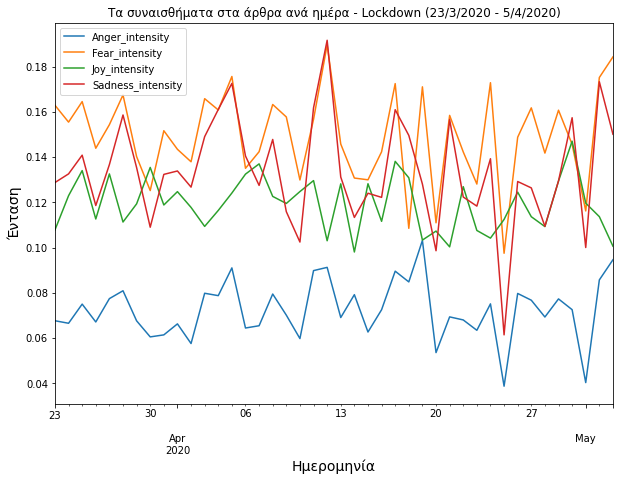

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

lockdown1 = df_news[(df_news.index>='2020-03-23')&(df_news.index<='2020-05-04')]  

lockdown1.resample('D').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα στα άρθρα ανά ημέρα - Lockdown (23/3/2020 - 5/4/2020)')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

No handles with labels found to put in legend.


Text(0, 0.5, 'Scores')

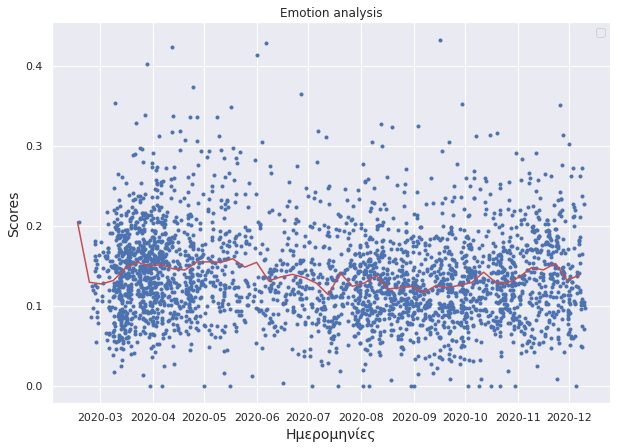

In [ ]:
df_news.index = pd.to_datetime(df_news.index)


plt.figure(figsize = (10,7))
plt.plot(df_news['Fear_intensity'],'.')
#plt.plot(df_news['Joy_intensity'].resample(M).mean(),'r')
plt.plot(df_news['Fear_intensity'].resample('7D').mean(),'r')

plt.legend()
plt.title('Emotion analysis')
plt.xlabel('Ημερομηνίες', fontsize=14)
plt.ylabel('Scores', fontsize=14)

#plt.hist(df_news['Joy_intensity'],'.')

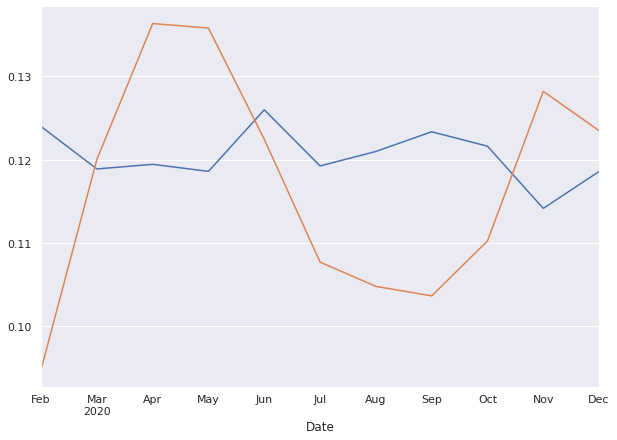

In [ ]:
df_news['Joy_intensity'].resample('M').mean().plot(figsize = (10,7))
df_news['Sadness_intensity'].resample('M').mean().plot(figsize = (10,7))

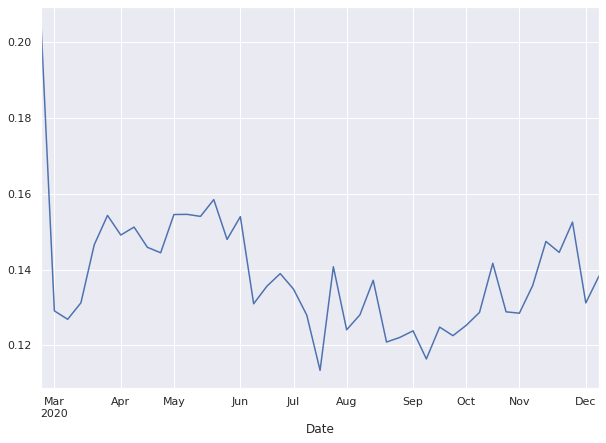

In [ ]:
df_news['Fear_intensity'].resample('W').mean().plot(figsize = (10,7))


Text(0, 0.5, 'Bαθμολογίες')

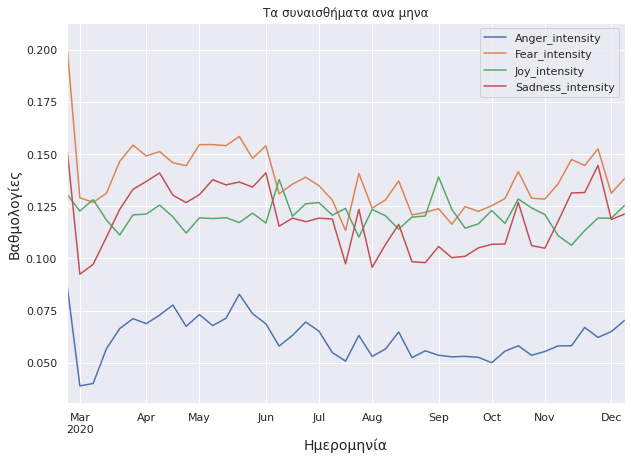

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news.resample('W').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Bαθμολογίες', fontsize=14)

In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Ένταση')

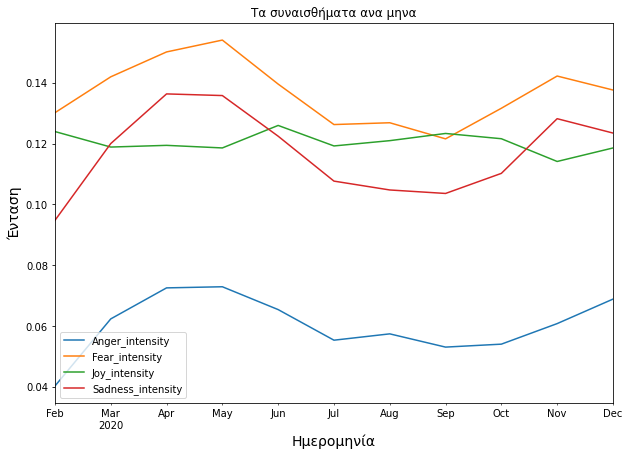

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news.resample('M').mean().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Ένταση', fontsize=14)

In [ ]:
df_news.index = pd.to_datetime(df_news.index)

df_news.resample('M').max().plot(figsize = (10,7))
plt.legend()
plt.title('Τα συναισθήματα ανα μηνα')
plt.xlabel('Ημερομηνία', fontsize=14)
plt.ylabel('Bαθμολογίες', fontsize=14)

AssertionError: ignored

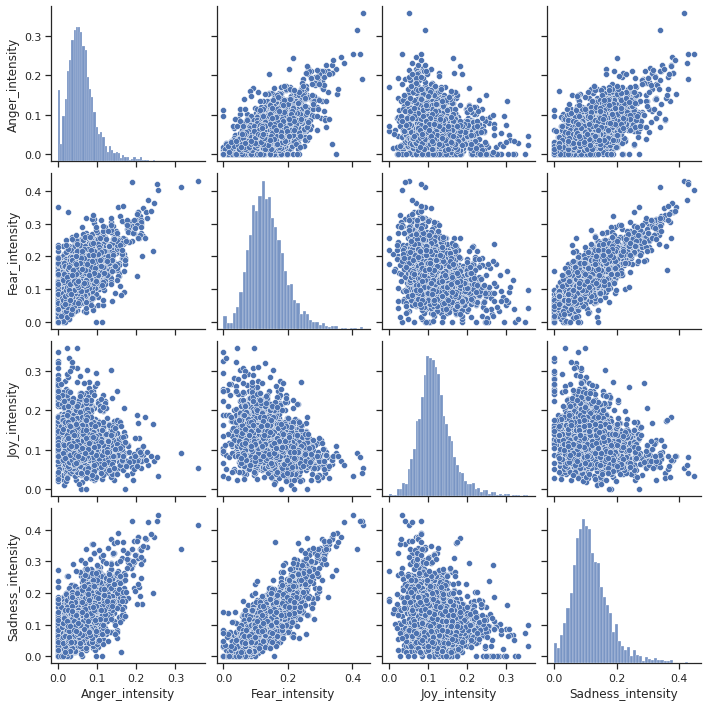

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_news)

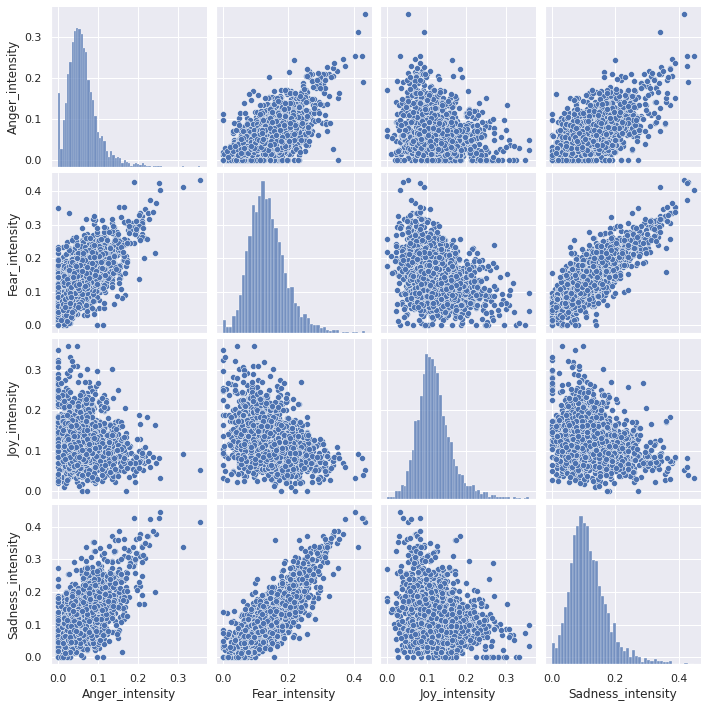

In [ ]:
sns.set_theme(style="darkgrid")

sns.pairplot(df_news)